## 1. Exploratory Data Analysis

Importing necessary Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import windrose as wr
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.ticker as ticker

Importing the dataset

In [3]:
df = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data_incl_features.csv')
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,IS_HOLIDAY,WS10,WS100,WD10,WD100,WD100CARD,WD10CARD,U100NORM,V100NORM
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,1,3.421530,4.652334,321.614439,321.999735,NW,NW,0.615665,-0.788008
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,1,3.096451,4.154892,305.473680,306.385781,NW,NW,0.805041,-0.593219
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,1,2.795932,3.712577,287.108562,289.088098,WNW,WNW,0.945017,-0.327022
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,1,2.461699,3.234831,273.345160,276.310236,W,W,0.993941,-0.109912
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,1,2.279435,2.976332,260.159324,263.581938,W,W,0.993733,0.111782


Now we will do the data analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ZONEID      175440 non-null  int64  
 1   TIMESTAMP   175440 non-null  object 
 2   TARGETVAR   175265 non-null  float64
 3   U10         175440 non-null  float64
 4   V10         175440 non-null  float64
 5   U100        175440 non-null  float64
 6   V100        175440 non-null  float64
 7   HOUR        175440 non-null  int64  
 8   MONTH       175440 non-null  int64  
 9   WEEKDAY     175440 non-null  int64  
 10  IS_HOLIDAY  175440 non-null  int64  
 11  WS10        175440 non-null  float64
 12  WS100       175440 non-null  float64
 13  WD10        175440 non-null  float64
 14  WD100       175440 non-null  float64
 15  WD100CARD   175440 non-null  object 
 16  WD10CARD    175440 non-null  object 
 17  U100NORM    175440 non-null  float64
 18  V100NORM    175440 non-null  float64
dtypes:

In [5]:
# Cast TIMESTAMP to be of pandas datetime format
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ZONEID      175440 non-null  int64         
 1   TIMESTAMP   175440 non-null  datetime64[ns]
 2   TARGETVAR   175265 non-null  float64       
 3   U10         175440 non-null  float64       
 4   V10         175440 non-null  float64       
 5   U100        175440 non-null  float64       
 6   V100        175440 non-null  float64       
 7   HOUR        175440 non-null  int64         
 8   MONTH       175440 non-null  int64         
 9   WEEKDAY     175440 non-null  int64         
 10  IS_HOLIDAY  175440 non-null  int64         
 11  WS10        175440 non-null  float64       
 12  WS100       175440 non-null  float64       
 13  WD10        175440 non-null  float64       
 14  WD100       175440 non-null  float64       
 15  WD100CARD   175440 non-null  object        
 16  WD

In [6]:
df.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,IS_HOLIDAY,WS10,WS100,WD10,WD100,U100NORM,V100NORM
count,175440.00000,175265.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000
mean,5.50000,0.358588,0.818499,0.120835,1.272769,0.058513,11.500000,6.519836,2.997036,0.019095,3.988859,6.565405,191.154030,193.595877,0.130865,0.061113
std,2.87229,0.310085,3.031781,3.105553,4.816235,5.096587,6.922206,3.449561,2.003307,0.136859,1.899898,2.773068,100.801425,100.445514,0.676979,0.721695
min,1.00000,0.000000,-8.371644,-12.923576,-12.425352,-19.791997,0.000000,1.000000,0.000000,0.000000,0.023234,0.012818,0.000813,0.003109,-1.000000,-1.000000
25%,3.00000,0.080344,-1.498648,-2.116981,-2.404248,-3.768786,5.750000,4.000000,1.000000,0.000000,2.486958,4.657228,114.377415,120.636147,-0.475728,-0.689990
50%,5.50000,0.278670,0.548880,0.410020,1.053103,0.785671,11.500000,7.000000,3.000000,0.000000,3.706721,6.370377,200.199712,203.515064,0.207806,0.159070
75%,8.00000,0.602033,2.805379,2.364026,4.734727,4.091509,17.250000,10.000000,5.000000,0.000000,5.162363,8.216829,272.209824,273.847020,0.798629,0.775858
max,10.00000,1.000000,14.837177,11.401396,21.399071,16.304799,23.000000,12.000000,6.000000,1.000000,15.233722,22.155522,359.997118,359.999089,1.000000,1.000000


The data set comprises six variables:
- ZONEID: The windpark ID (numbers from 1 to 10)
- TIMESTAMP: The timestamp of the observation
- TARGETVAR: The normalized electricity production at timestamp t
- U10/U100: Eastward wind at height above ground 10m and height 100m
- V10/V100: Northward wind at height above ground 10m and height 100m

In [7]:
df.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,IS_HOLIDAY,WS10,WS100,WD10,WD100,U100NORM,V100NORM
count,175440.00000,175265.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000
mean,5.50000,0.358588,0.818499,0.120835,1.272769,0.058513,11.500000,6.519836,2.997036,0.019095,3.988859,6.565405,191.154030,193.595877,0.130865,0.061113
std,2.87229,0.310085,3.031781,3.105553,4.816235,5.096587,6.922206,3.449561,2.003307,0.136859,1.899898,2.773068,100.801425,100.445514,0.676979,0.721695
min,1.00000,0.000000,-8.371644,-12.923576,-12.425352,-19.791997,0.000000,1.000000,0.000000,0.000000,0.023234,0.012818,0.000813,0.003109,-1.000000,-1.000000
25%,3.00000,0.080344,-1.498648,-2.116981,-2.404248,-3.768786,5.750000,4.000000,1.000000,0.000000,2.486958,4.657228,114.377415,120.636147,-0.475728,-0.689990
50%,5.50000,0.278670,0.548880,0.410020,1.053103,0.785671,11.500000,7.000000,3.000000,0.000000,3.706721,6.370377,200.199712,203.515064,0.207806,0.159070
75%,8.00000,0.602033,2.805379,2.364026,4.734727,4.091509,17.250000,10.000000,5.000000,0.000000,5.162363,8.216829,272.209824,273.847020,0.798629,0.775858
max,10.00000,1.000000,14.837177,11.401396,21.399071,16.304799,23.000000,12.000000,6.000000,1.000000,15.233722,22.155522,359.997118,359.999089,1.000000,1.000000


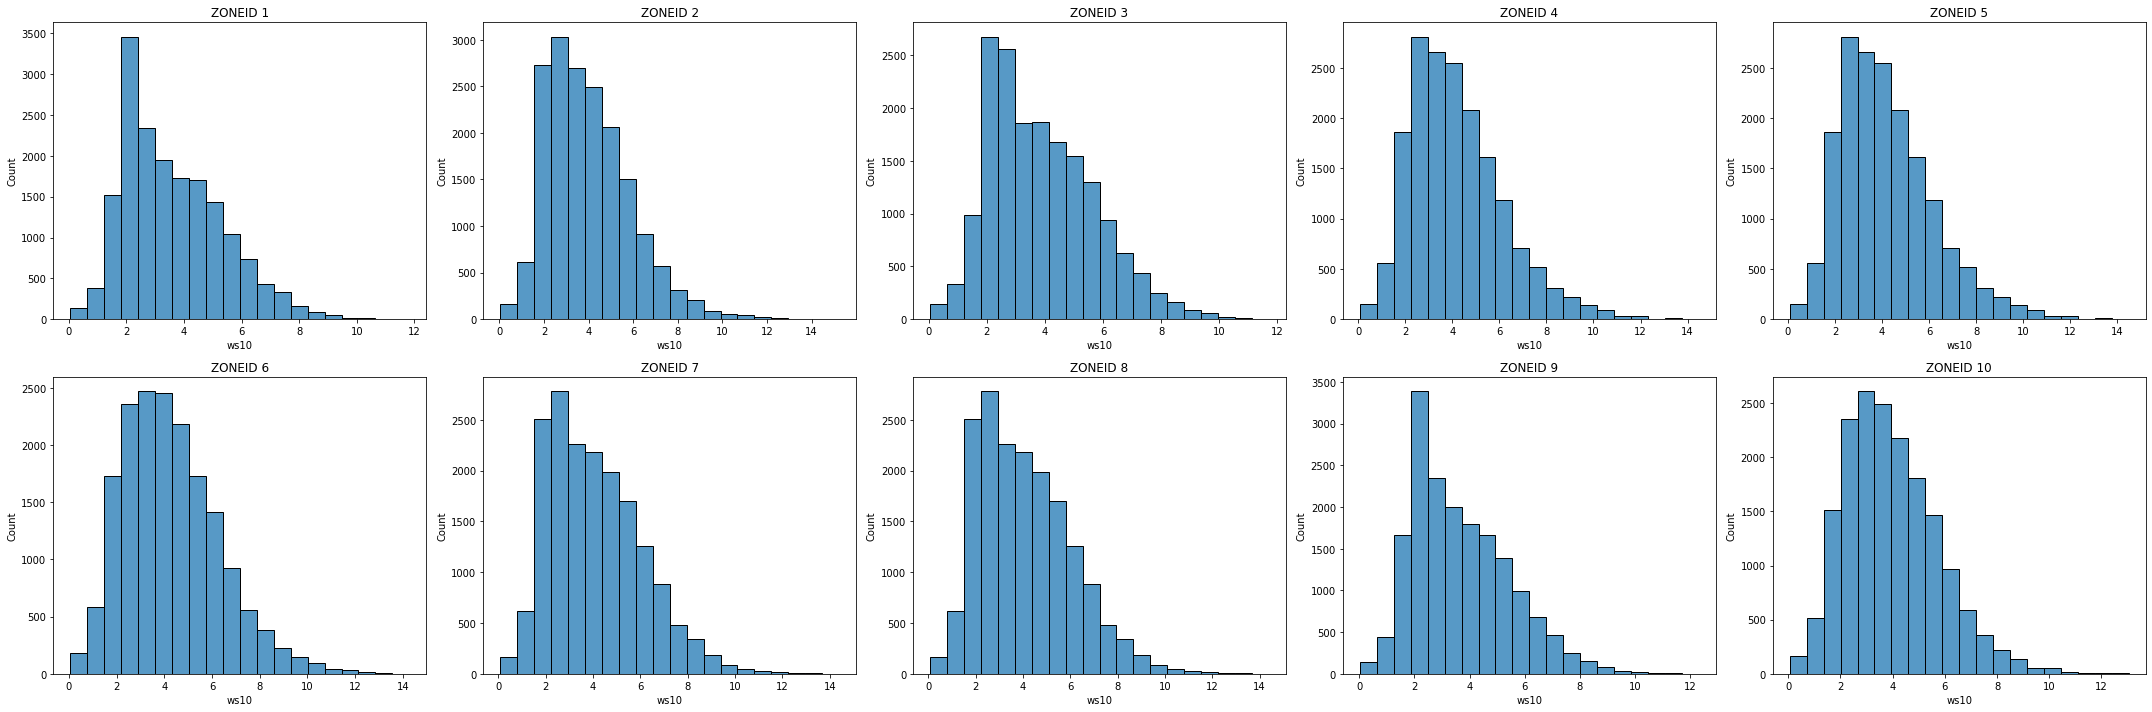

In [12]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws10', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

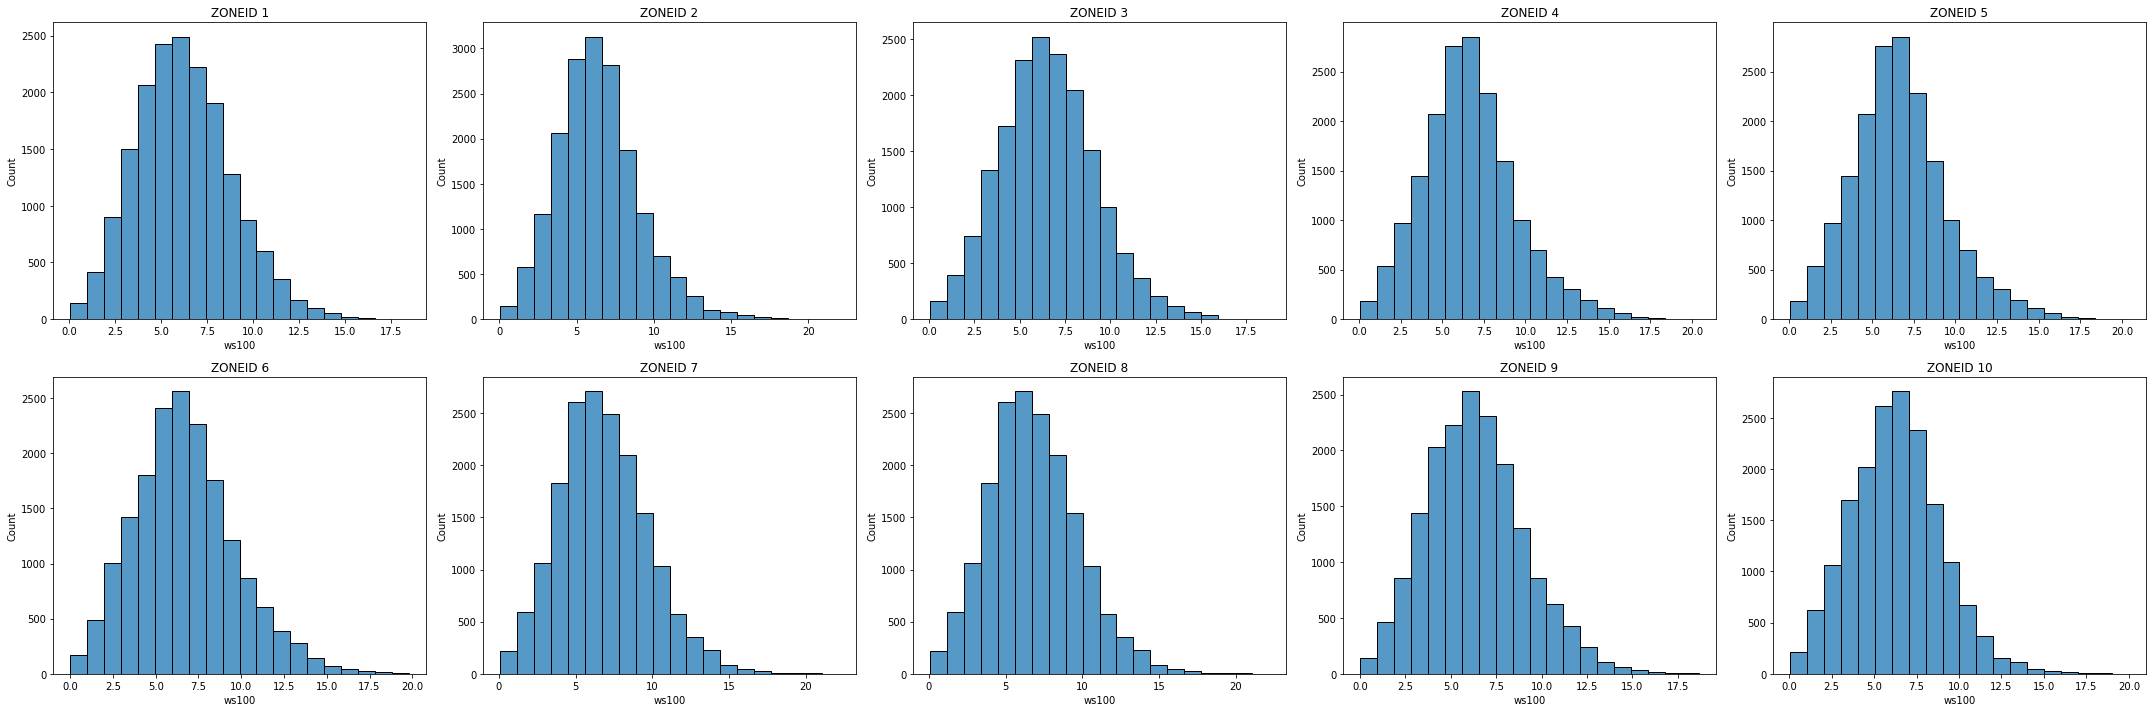

In [13]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws100', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

<AxesSubplot:xlabel='ws100', ylabel='Count'>

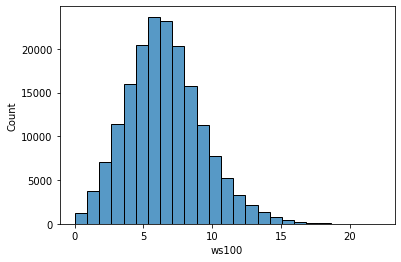

In [14]:
sns.histplot(data = df, x = 'ws100', bins = 25)

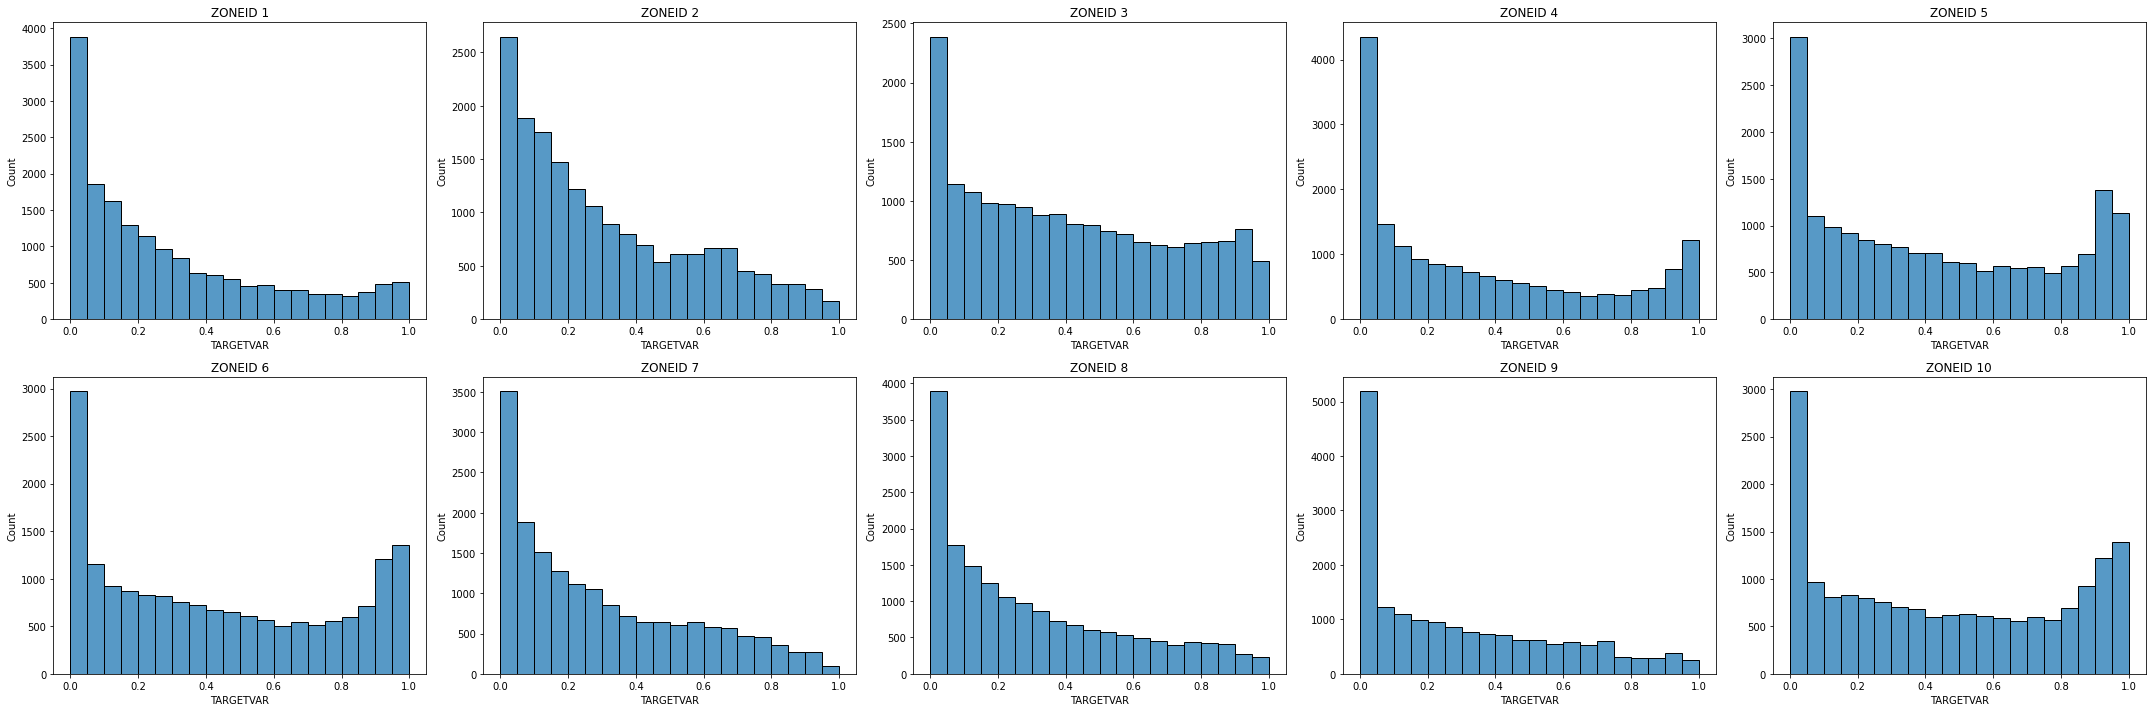

In [15]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'TARGETVAR', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

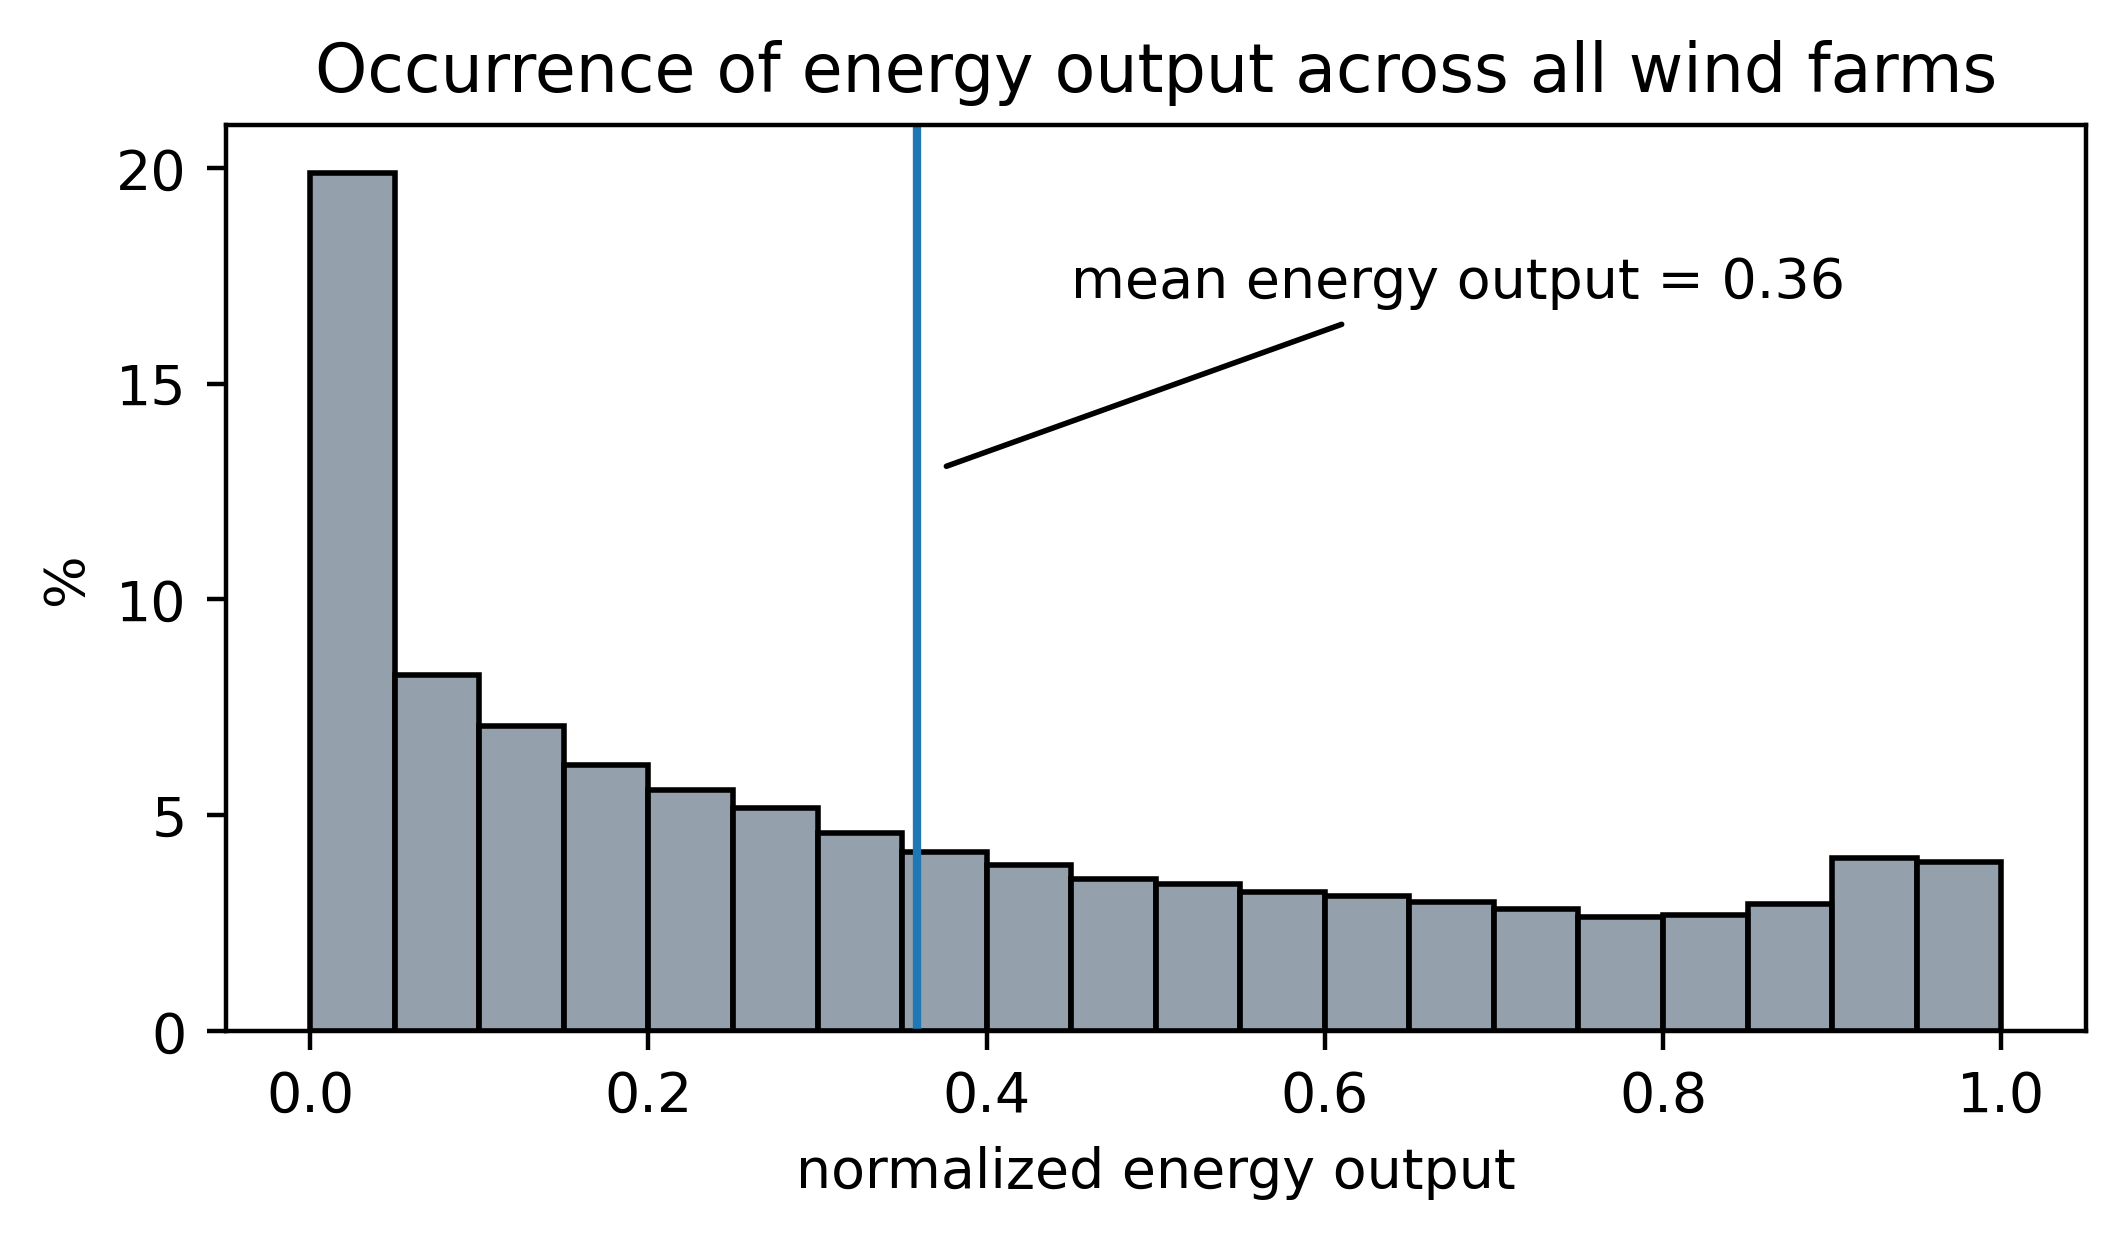

In [16]:
fig, ax = plt.subplots(figsize = (6, 3), dpi = 400)

sns.histplot(data = df, x = 'TARGETVAR', bins = 20, ax = ax, stat = 'percent', color = 'slategray')
ax.set_title('Occurrence of energy output across all wind farms')
ax.set_ylabel('%', rotation = 90)
y_labels = []
ax.set_xlabel('normalized energy output')
ax.set_ylim([0,21])
ax.annotate(f'mean energy output = {round(df.TARGETVAR.mean(),2)}', xy=(0.37, 13), xytext=(0.45, 17),
           arrowprops=dict(arrowstyle = '-',  facecolor='gray'))
plt.axvline(x = df.TARGETVAR.mean())

(0.0, 0.6)

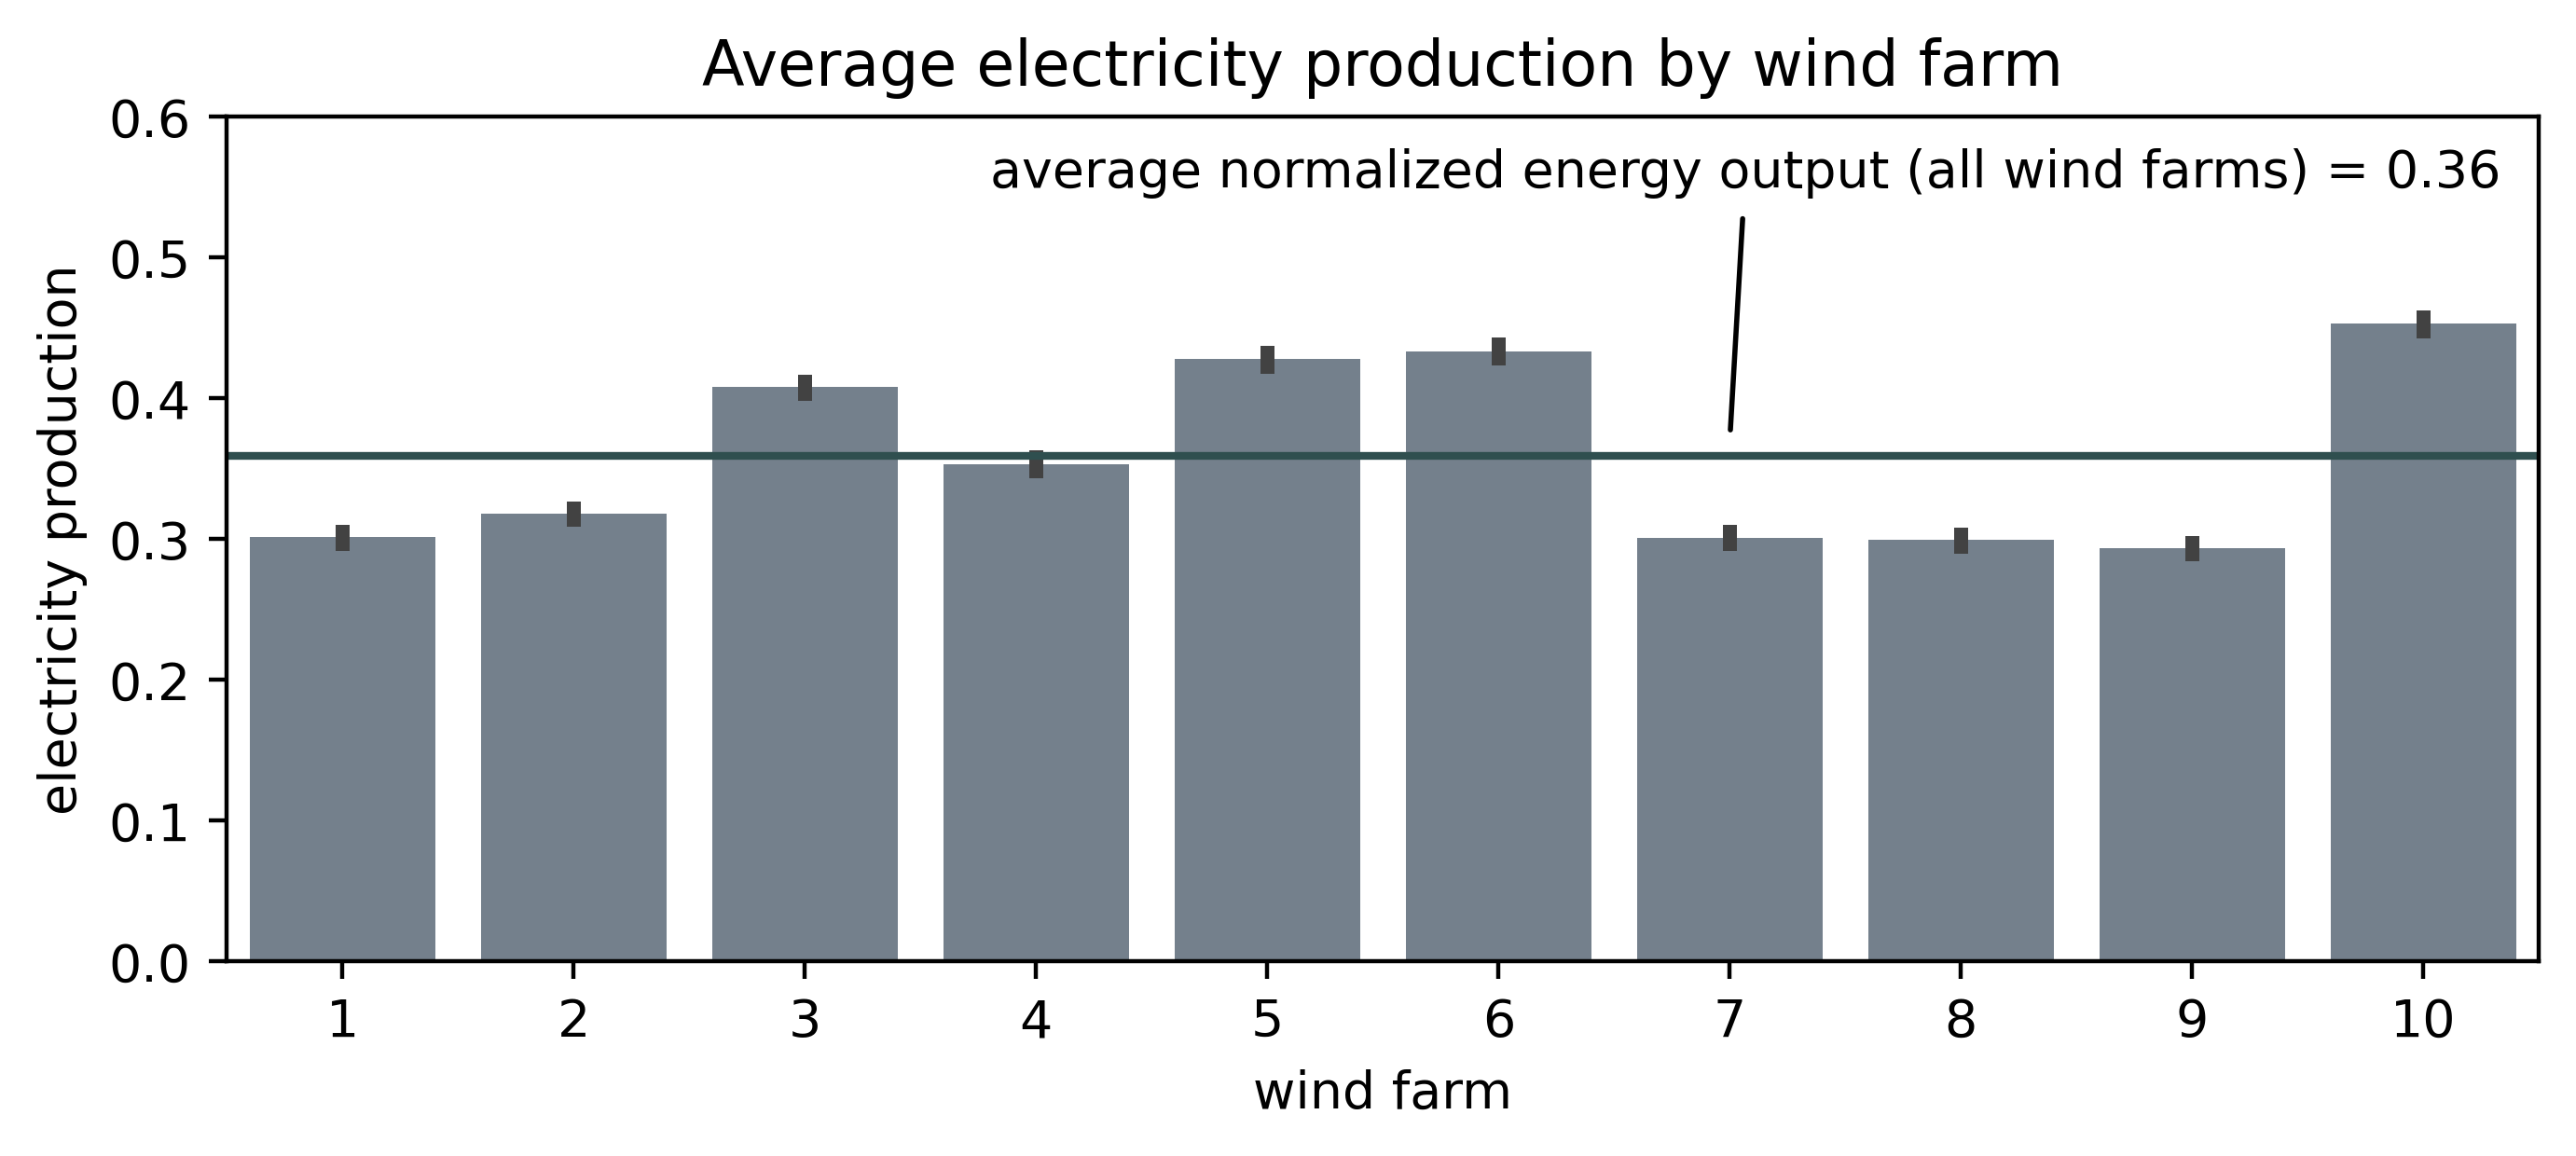

In [17]:
fig, ax = plt.subplots(figsize = (8, 3), dpi = 400)

sns.barplot(data = df, x = 'ZONEID', y = 'TARGETVAR', ax = ax,  color = 'slategray')
ax.set_title('Average electricity production by wind farm')
ax.set_ylabel('electricity production')
y_labels = []
ax.set_xlabel('wind farm')
ax.annotate(f'average normalized energy output (all wind farms) = {round(df.TARGETVAR.mean(),2)}', xy=(6, 0.37), xytext=(2.8, 0.55),
            arrowprops=dict(arrowstyle = '-',  facecolor='black'))
plt.axhline(y = df.TARGETVAR.mean(), color = 'darkslategray')
plt.ylim((0,0.6))

In [18]:
round(df.TARGETVAR.median(),2)

0.28

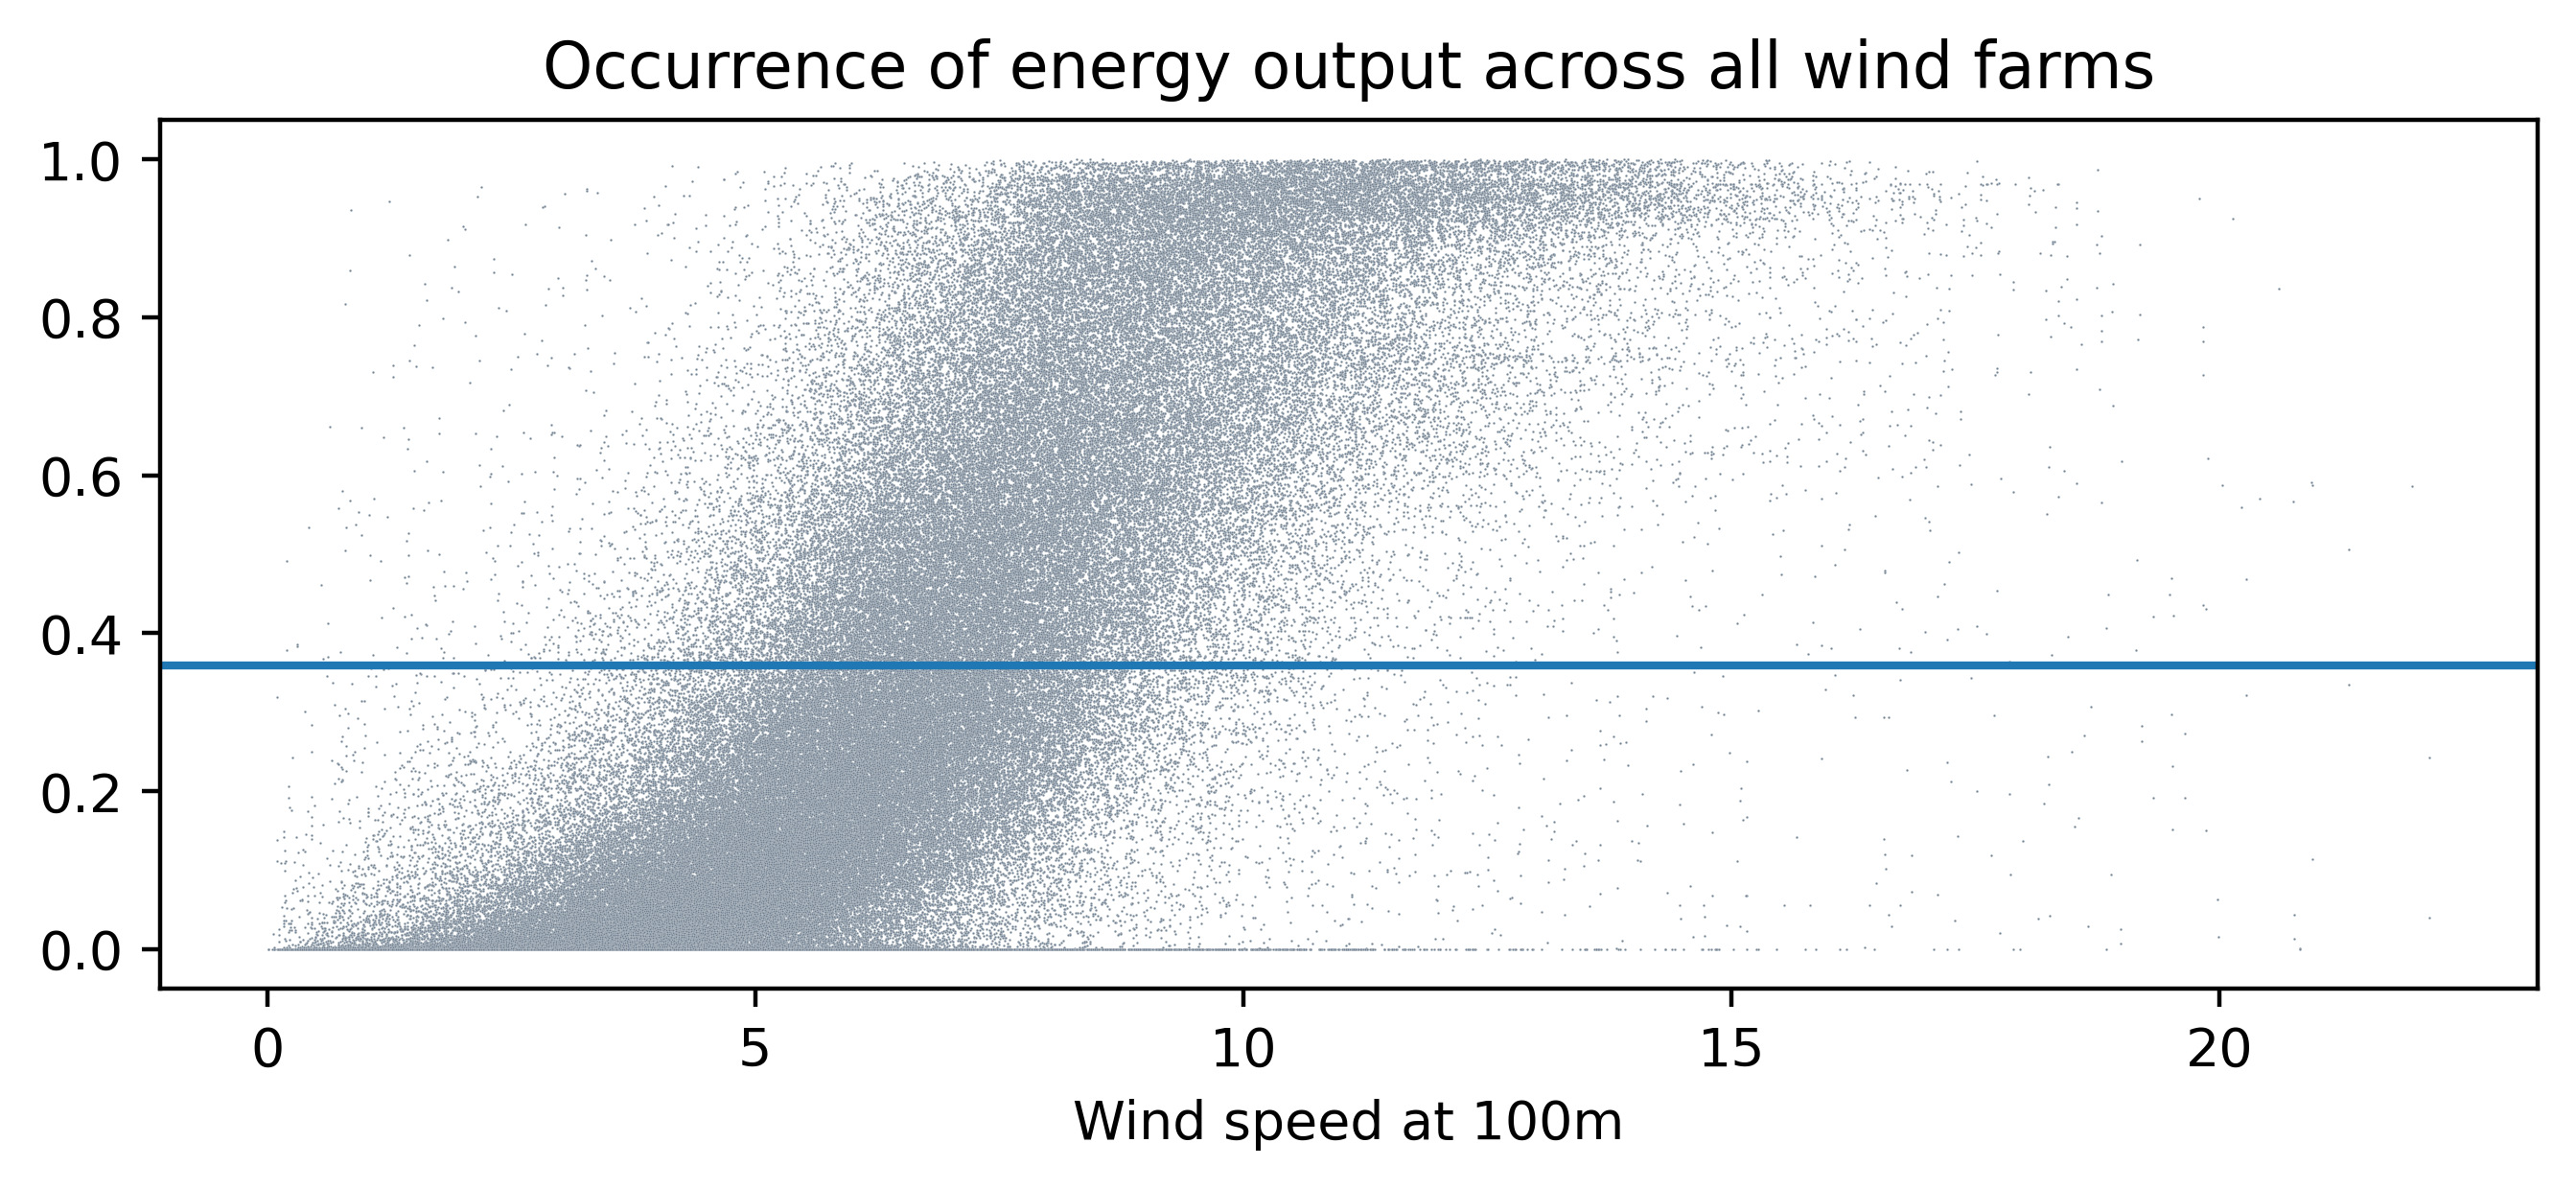

In [19]:
fig, ax = plt.subplots(figsize = (8, 3), dpi = 400)

sns.scatterplot(data = df, x = 'ws100',y = 'TARGETVAR',  ax = ax, color = 'slategray', s = 0.2)
ax.set_title('Occurrence of energy output across all wind farms')
ax.set_ylabel('')
y_labels = []
ax.set_xlabel('Wind speed at 100m')
ax.annotate('mean normalized energy output', xy=(0.37, 15), xytext=(0.45, 17),
            arrowprops=dict(arrowstyle = '-',  facecolor='black'))
plt.axhline(y = df.TARGETVAR.mean())
plt.show()

## Analysis by time

In [20]:
df['HOUR'] = df.TIMESTAMP.dt.hour
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,WD10CARD,U100NORM,V100NORM,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,NW,0.615665,-0.788008,3.421530,4.652334,4.0,322.0,322.0,NW,NW
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,...,NW,0.805041,-0.593219,3.096451,4.154892,4.0,305.0,306.0,NW,NW
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,...,WNW,0.945017,-0.327022,2.795932,3.712577,4.0,287.0,289.0,WNW,WNW
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,...,W,0.993941,-0.109912,2.461699,3.234831,4.0,273.0,276.0,W,W
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,...,W,0.993733,0.111782,2.279435,2.976332,2.0,260.0,264.0,W,W


In [21]:
df['MONTH'] = df.TIMESTAMP.dt.month
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,WD10CARD,U100NORM,V100NORM,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,NW,0.615665,-0.788008,3.421530,4.652334,4.0,322.0,322.0,NW,NW
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,...,NW,0.805041,-0.593219,3.096451,4.154892,4.0,305.0,306.0,NW,NW
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,...,WNW,0.945017,-0.327022,2.795932,3.712577,4.0,287.0,289.0,WNW,WNW
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,...,W,0.993941,-0.109912,2.461699,3.234831,4.0,273.0,276.0,W,W
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,...,W,0.993733,0.111782,2.279435,2.976332,2.0,260.0,264.0,W,W


<Figure size 432x288 with 0 Axes>

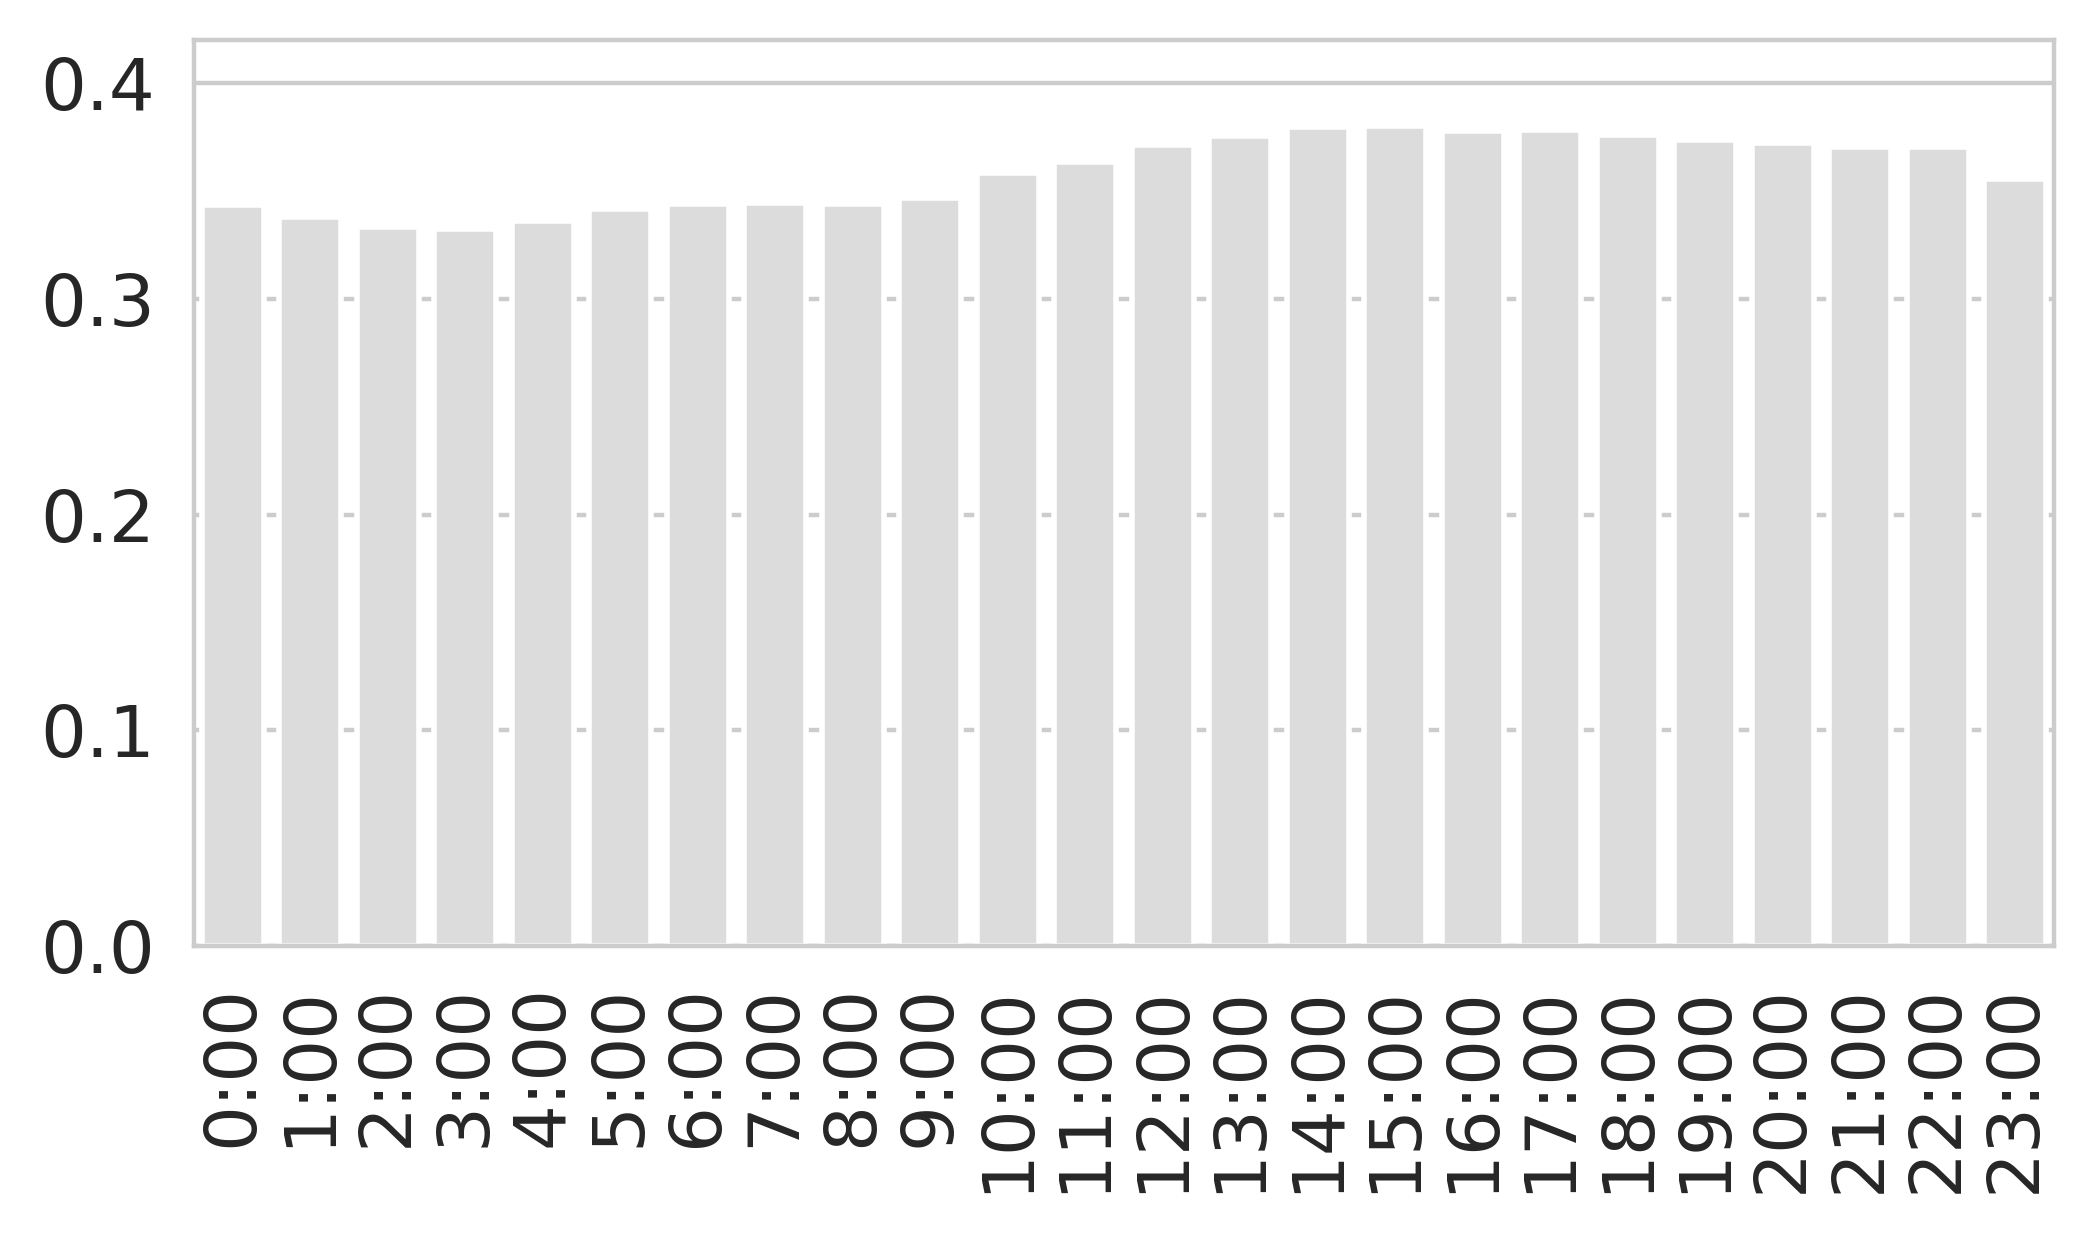

In [22]:
sns.set_style("whitegrid")
sns.despine()
fontsize = 13

fig, ax = plt.subplots(figsize = (6,3), dpi = 400)
sns.barplot(data = df, x = 'HOUR', y = 'TARGETVAR', color = 'gainsboro', errcolor='gray', ax = ax, ci = None)
ax.set_xticklabels(['{}:00'.format(str(i)) for i, _ in enumerate(ax.get_xticklabels())])
ax.tick_params(axis='both', labelsize=fontsize)
plt.xticks(rotation = 90)
plt.ylim([0,0.42])
#plt.axhline(np.mean(df.TARGETVAR, color = 'gray'))
#plt.title('Electricity production by hour of the day')
plt.ylabel('')
plt.xlabel('')
plt.show()

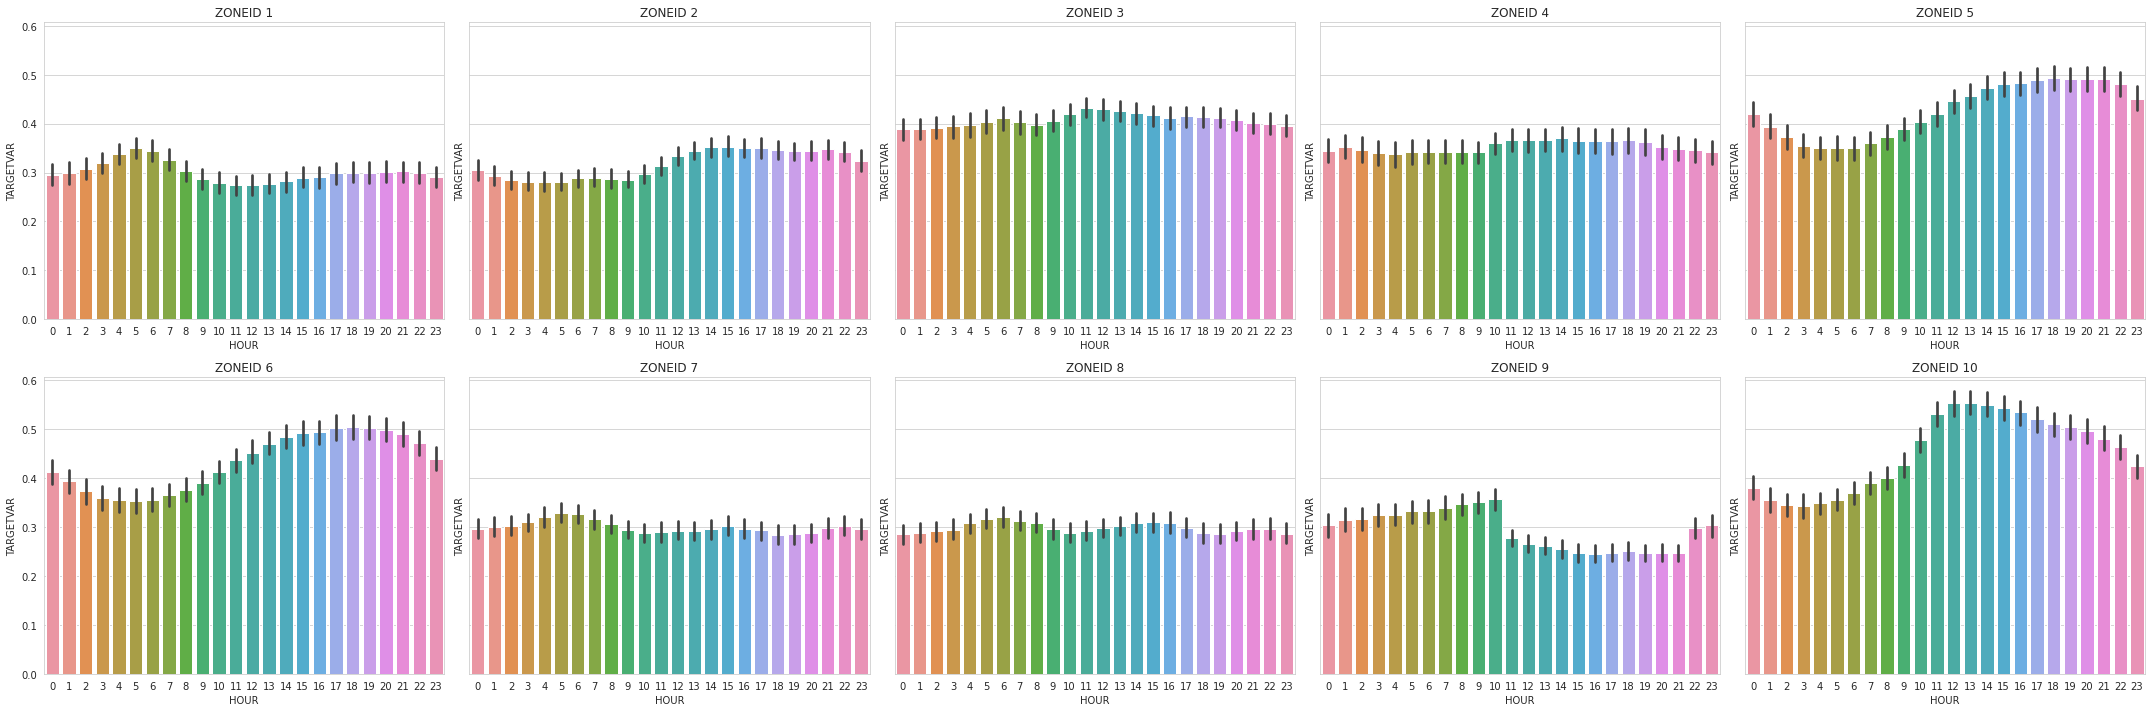

In [23]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    gb = df[df['ZONEID'] == zone].groupby(by = ['HOUR']).mean()
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'HOUR', y = 'TARGETVAR', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

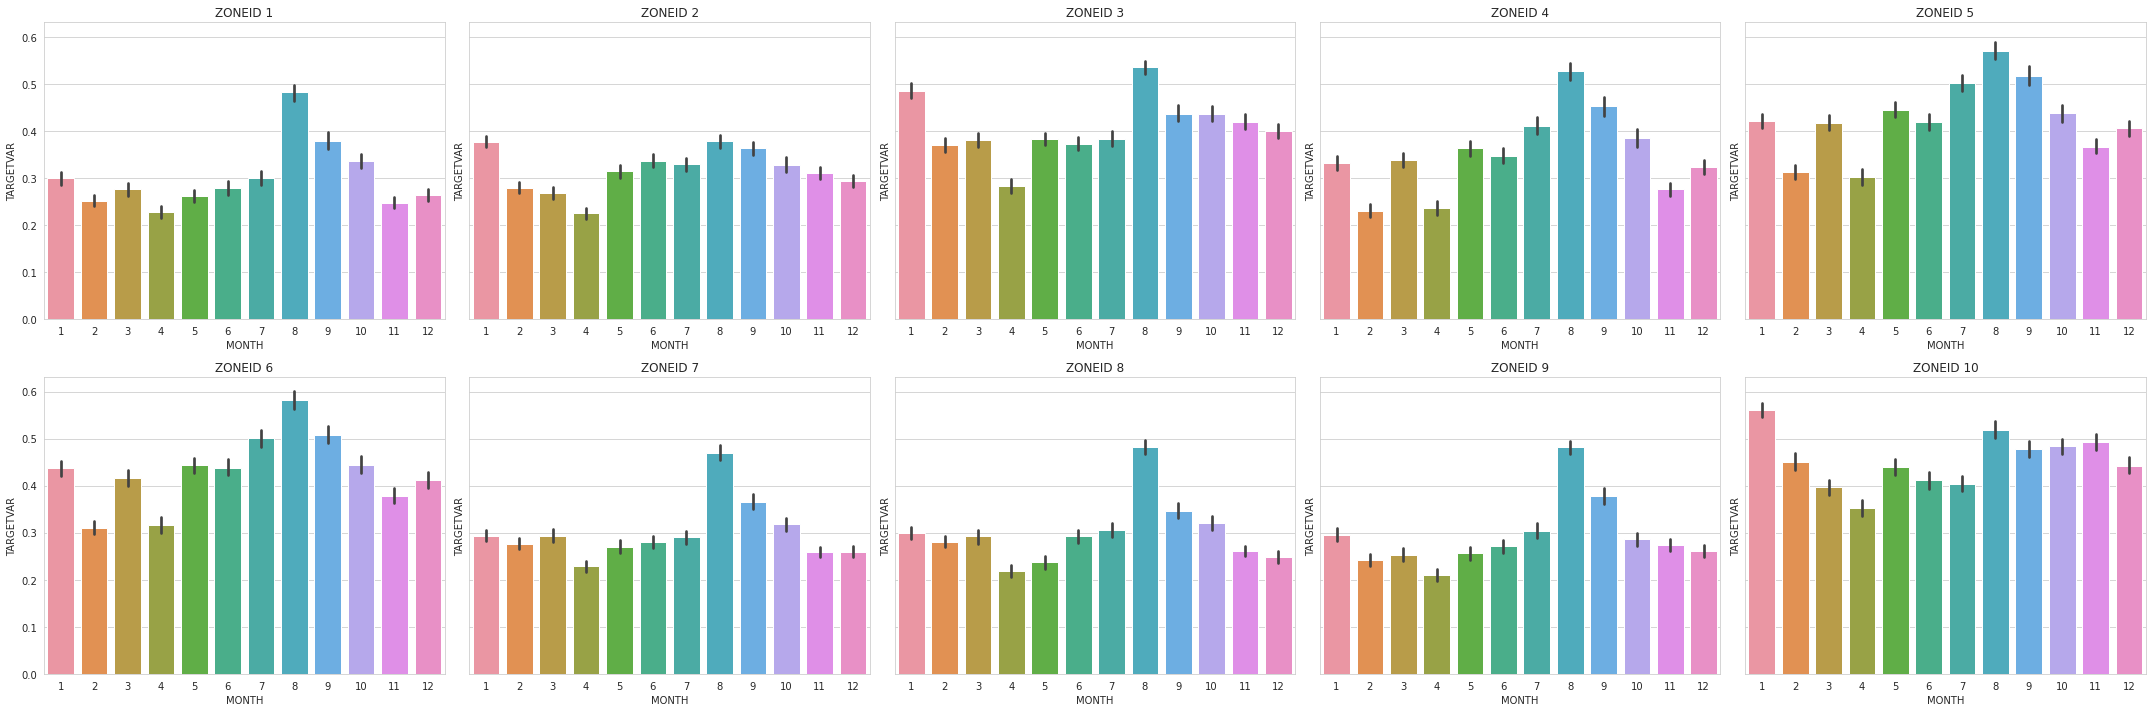

In [24]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'MONTH', y = 'TARGETVAR', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

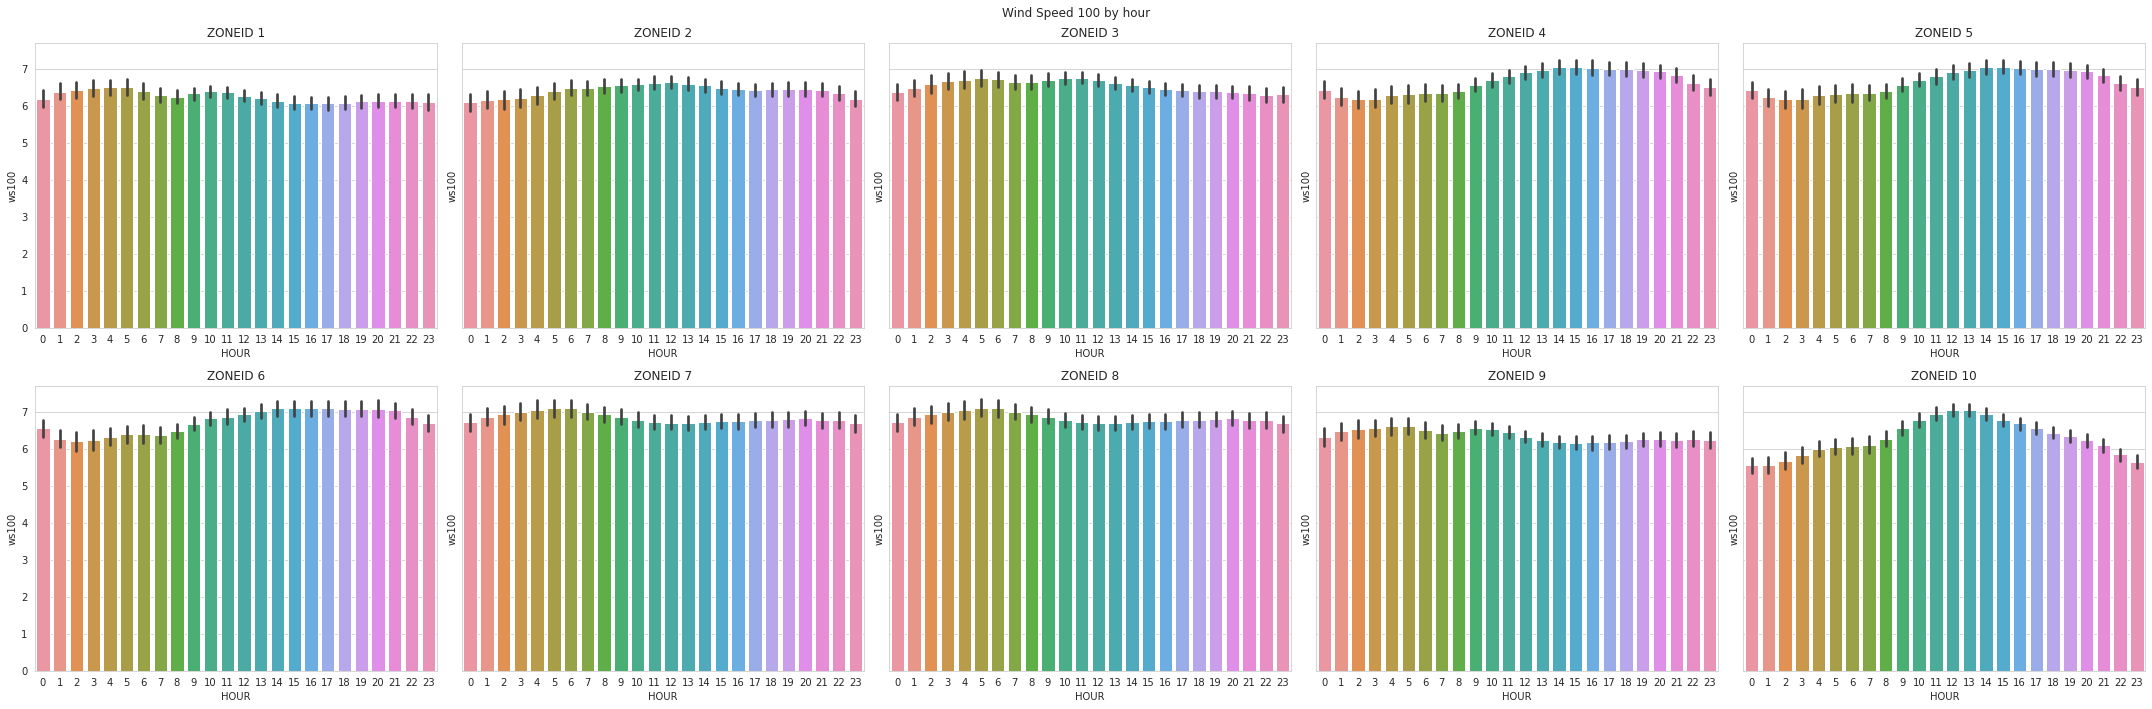

In [25]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'HOUR', y = 'ws100', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))
    
fig.suptitle('Wind Speed 100 by hour')

fig.tight_layout()

<AxesSubplot:xlabel='HOUR', ylabel='ws100'>

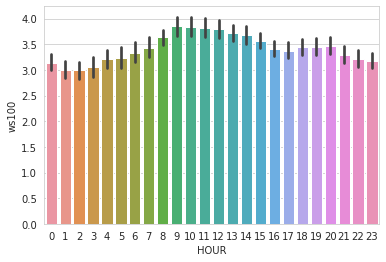

In [26]:
df_zero = df[df.TARGETVAR == 0 | df.TARGETVAR.isna()]
df_zero
sns.barplot(data = df_zero, x = 'HOUR', y = 'ws100')

In [27]:
df['wd10_rd'] = (df.wd10 // 5) * 5
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,U100NORM,V100NORM,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card,wd10_rd
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,0.615665,-0.788008,3.421530,4.652334,4.0,322.0,322.0,NW,NW,320.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,...,0.805041,-0.593219,3.096451,4.154892,4.0,305.0,306.0,NW,NW,305.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,...,0.945017,-0.327022,2.795932,3.712577,4.0,287.0,289.0,WNW,WNW,285.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,...,0.993941,-0.109912,2.461699,3.234831,4.0,273.0,276.0,W,W,270.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,...,0.993733,0.111782,2.279435,2.976332,2.0,260.0,264.0,W,W,260.0


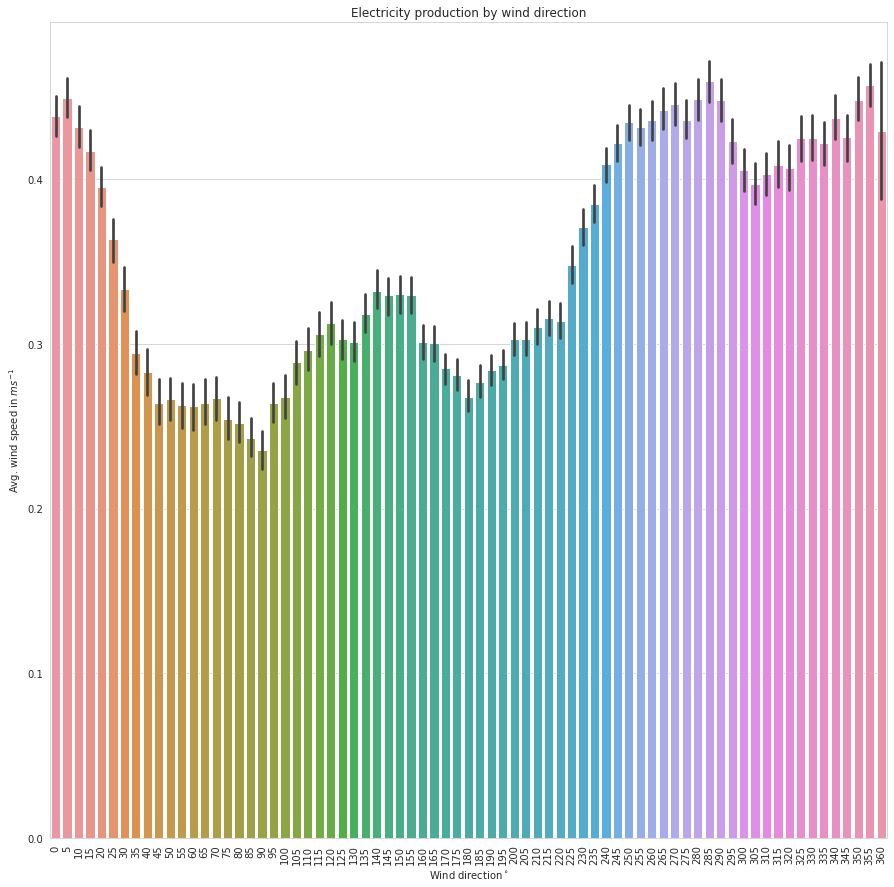

In [28]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.barplot(data = df, x = 'wd10_rd', y = 'TARGETVAR', ax = ax)
ax.set_xticklabels([int(x) for x in sorted(df.wd10_rd.unique())])
plt.xlabel('Wind direction' + r'$^\circ$')
plt.ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
plt.xticks(rotation=90)
plt.title('Electricity production by wind direction')
plt.show()

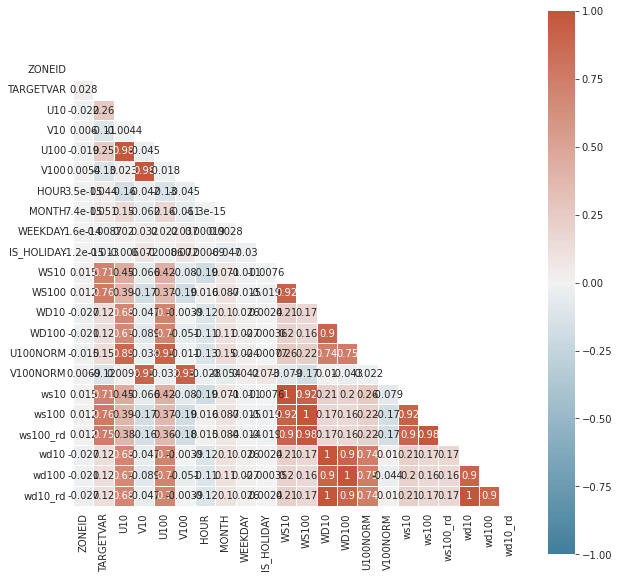

In [29]:
fig, ax = plt.subplots(figsize= (10,10))
cmap = sns.diverging_palette(230,20, as_cmap=True)
ax = sns.heatmap( df.corr(), mask = np.triu(np.ones_like(df.corr(), dtype = bool)),cmap = cmap, vmin = -1, vmax= 1, center = 0, annot = True, square = True, linewidths= .5)

<AxesSubplot:xlabel='ws10', ylabel='TARGETVAR'>

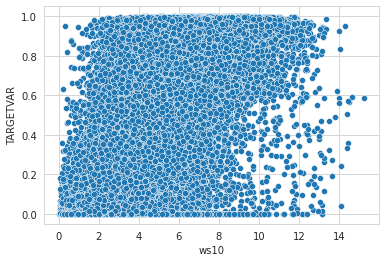

In [30]:
sns.scatterplot(x = 'ws10', y = 'TARGETVAR', data = df)

In [31]:
df_zero

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,WD10CARD,U100NORM,V100NORM,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card
0,1,2012-01-01 01:00:00,0.0,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,NW,0.615665,-0.788008,3.421530,4.652334,4.0,322.0,322.0,NW,NW
39,1,2012-01-02 16:00:00,0.0,-1.045900,1.512180,-0.978732,2.513280,16,1,0,...,SE,-0.362879,0.931836,1.838639,2.697127,2.0,145.0,159.0,SSE,SE
40,1,2012-01-02 17:00:00,0.0,-1.178455,1.414489,-1.011886,2.550219,17,1,0,...,SE,-0.368812,0.929504,1.841069,2.743635,2.0,140.0,158.0,SSE,SE
41,1,2012-01-02 18:00:00,0.0,-1.724081,1.156517,-1.658402,2.629451,18,1,0,...,SE,-0.533463,0.845823,2.076051,3.108747,4.0,124.0,148.0,SSE,ESE
42,1,2012-01-02 19:00:00,0.0,-1.746782,0.686247,-1.841271,2.091423,19,1,0,...,ESE,-0.660793,0.750568,1.876748,2.786455,2.0,111.0,139.0,SE,ESE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175393,10,2013-12-30 02:00:00,0.0,1.713923,-0.597229,2.062536,-0.692053,2,12,0,...,WNW,0.948055,-0.318106,1.814997,2.175544,2.0,289.0,289.0,WNW,WNW
175394,10,2013-12-30 03:00:00,0.0,2.018486,-0.193611,2.395452,-0.151059,3,12,0,...,W,0.998018,-0.062936,2.027750,2.400210,2.0,275.0,274.0,W,W
175423,10,2013-12-31 08:00:00,0.0,-0.325476,-0.528670,-0.395519,-0.646767,8,12,1,...,NNE,-0.521712,-0.853122,0.620828,0.758119,0.0,32.0,31.0,NNE,NNE
175424,10,2013-12-31 09:00:00,0.0,-0.720339,-0.593653,-1.503379,-1.269683,9,12,1,...,NE,-0.763989,-0.645229,0.933441,1.967802,2.0,51.0,50.0,NE,NE


<AxesSubplot:xlabel='MONTH', ylabel='count'>

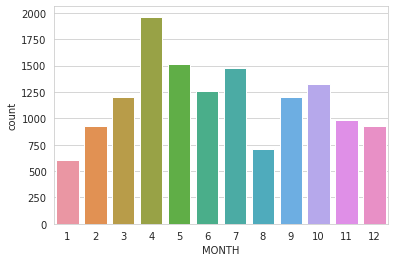

In [32]:
sns.countplot(data = df_zero, x = 'MONTH')

In [33]:
df_zero['ws100_rd'] = round(df_zero.ws100, 1) 
df_zero.head()

/tmp/ipykernel_79794/2935414869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero['ws100_rd'] = round(df_zero.ws100, 1)


,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,WD10CARD,U100NORM,V100NORM,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card
0,1,2012-01-01 01:00:00,0.0,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,NW,0.615665,-0.788008,3.421530,4.652334,4.7,322.0,322.0,NW,NW
39,1,2012-01-02 16:00:00,0.0,-1.045900,1.512180,-0.978732,2.513280,16,1,0,...,SE,-0.362879,0.931836,1.838639,2.697127,2.7,145.0,159.0,SSE,SE
40,1,2012-01-02 17:00:00,0.0,-1.178455,1.414489,-1.011886,2.550219,17,1,0,...,SE,-0.368812,0.929504,1.841069,2.743635,2.7,140.0,158.0,SSE,SE
41,1,2012-01-02 18:00:00,0.0,-1.724081,1.156517,-1.658402,2.629451,18,1,0,...,SE,-0.533463,0.845823,2.076051,3.108747,3.1,124.0,148.0,SSE,ESE
42,1,2012-01-02 19:00:00,0.0,-1.746782,0.686247,-1.841271,2.091423,19,1,0,...,ESE,-0.660793,0.750568,1.876748,2.786455,2.8,111.0,139.0,SE,ESE


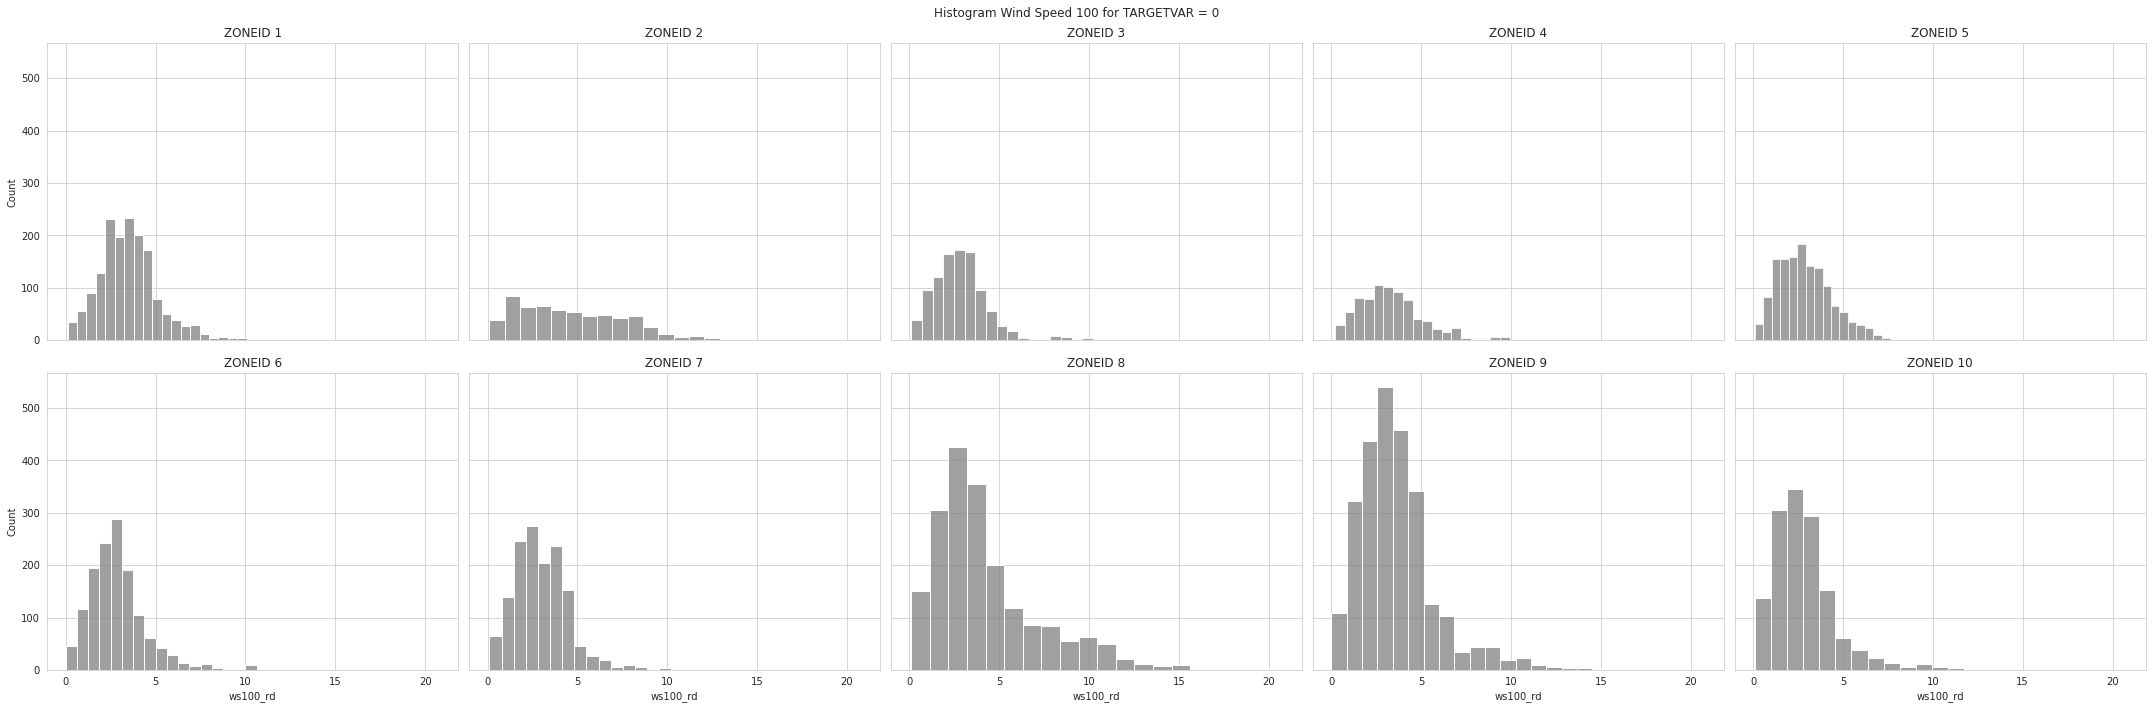

In [34]:
zones = df_zero.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df_zero[df_zero['ZONEID'] == zone], x = 'ws100_rd', ax = axs[zone - 1], color= "gray", bins = 20)
    axs[zone - 1].set_title('ZONEID '+ str(zone))
    
fig.suptitle('Histogram Wind Speed 100 for TARGETVAR = 0')

fig.tight_layout()

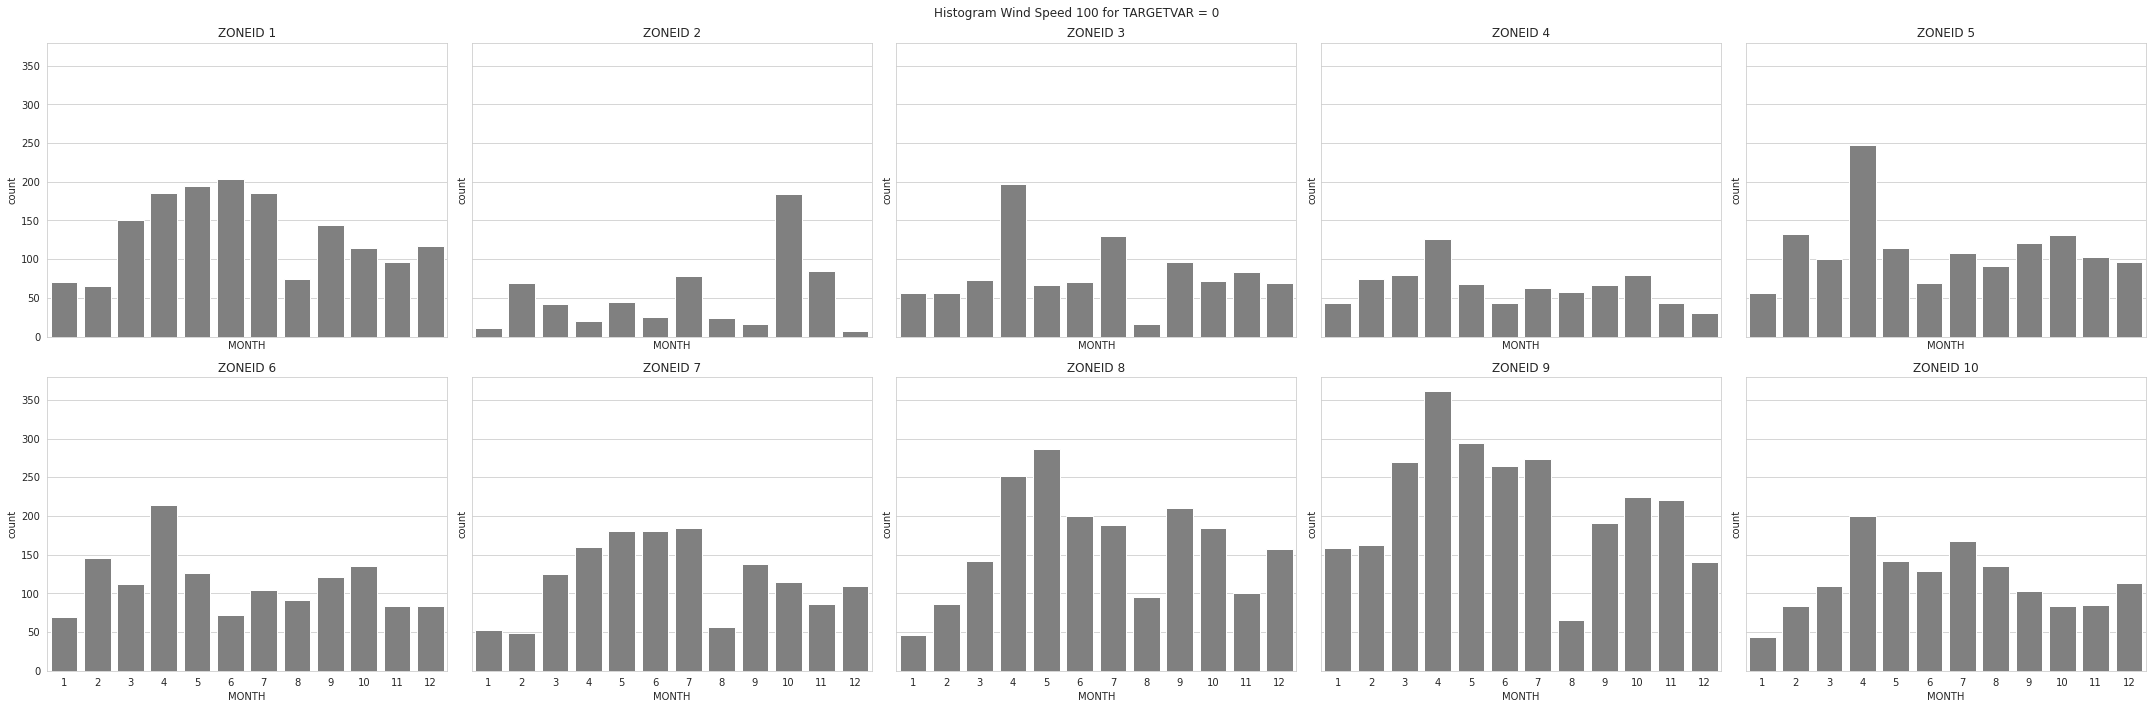

In [35]:
zones = df_zero.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)

axs = axs.ravel()

for zone in zones:
    sns.countplot(data = df_zero[df_zero['ZONEID'] == zone], x = 'MONTH', ax = axs[zone - 1], color= "gray")
    axs[zone - 1].set_title('ZONEID '+ str(zone))
    
fig.suptitle('Histogram Wind Speed 100 for TARGETVAR = 0')

fig.tight_layout()

In [36]:
df['zero'] = (df['TARGETVAR'] == 0) * 1
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,V100NORM,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card,wd10_rd,zero
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,-0.788008,3.421530,4.652334,4.0,322.0,322.0,NW,NW,320.0,1
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,...,-0.593219,3.096451,4.154892,4.0,305.0,306.0,NW,NW,305.0,0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,...,-0.327022,2.795932,3.712577,4.0,287.0,289.0,WNW,WNW,285.0,0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,...,-0.109912,2.461699,3.234831,4.0,273.0,276.0,W,W,270.0,0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,...,0.111782,2.279435,2.976332,2.0,260.0,264.0,W,W,260.0,0


In [37]:
zones = df.ZONEID.unique()
fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)
axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws100', hue = 'zero', ax = axs[zone - 1])
    
    
fig.suptitle('Histogram Wind Speed 100')

fig.tight_layout()

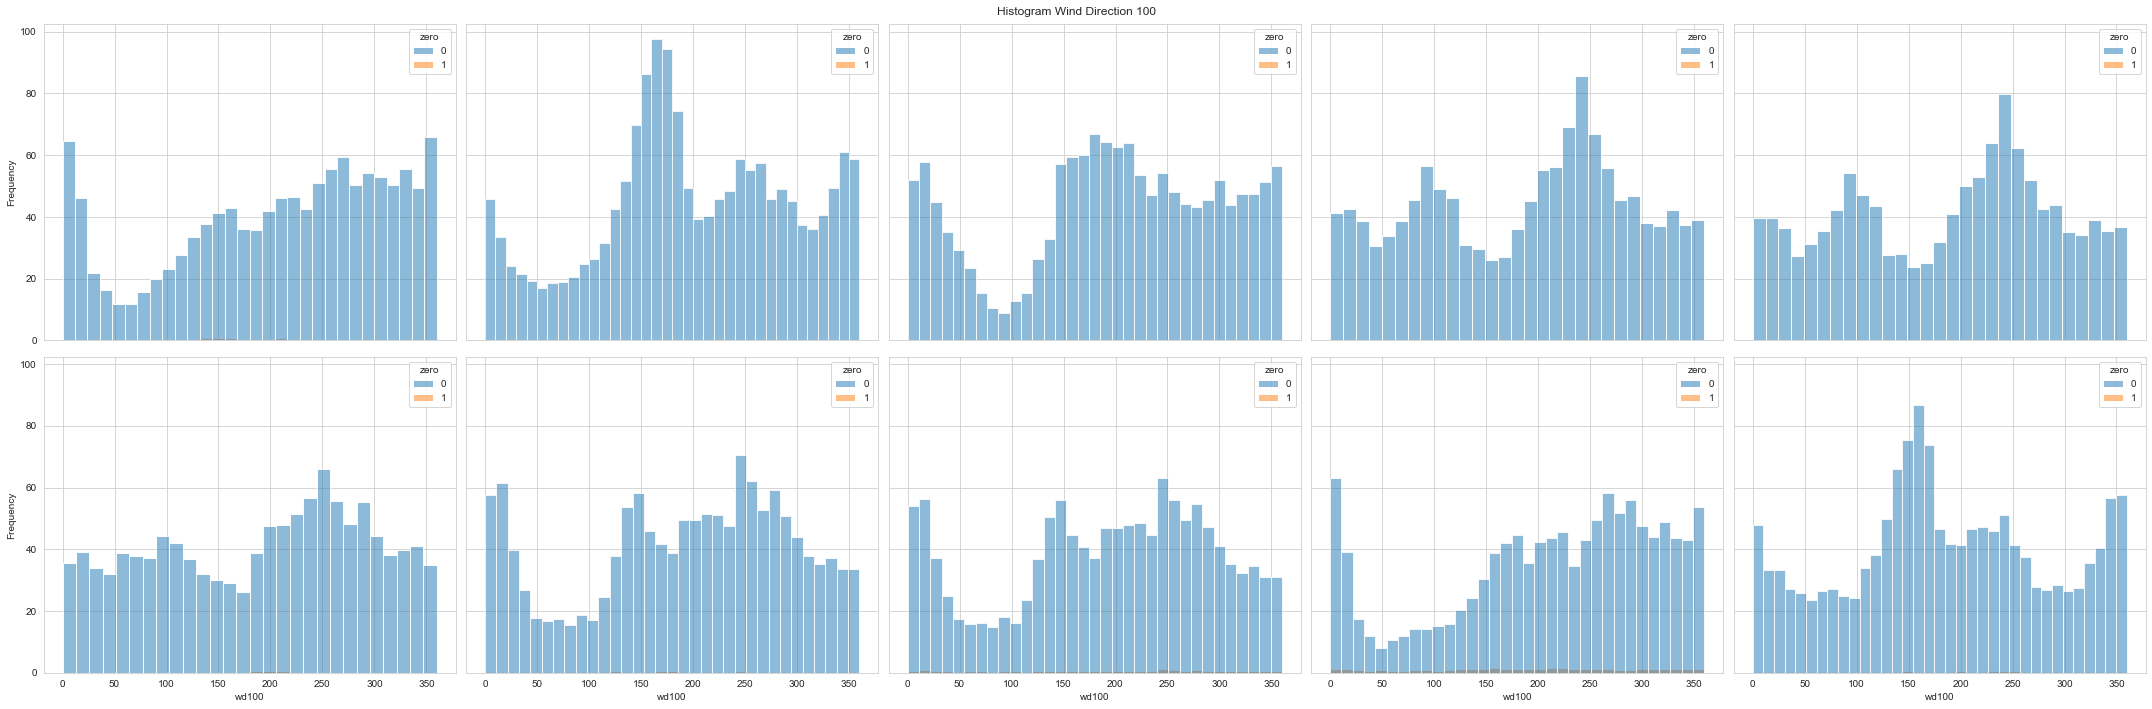

In [ ]:
zones = df.ZONEID.unique()
fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)
axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'wd100', hue = 'zero', ax = axs[zone - 1], stat = 'frequency')
    
    
fig.suptitle('Histogram Wind Direction 100')

fig.tight_layout()

In [ ]:
df.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100,ws10,ws100,ws100_rd,wd10,wd100,HOUR,MONTH,wd10_rd,zero
count,175440.00000,175265.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000
mean,5.50000,0.358588,0.818499,0.120835,1.272769,0.058513,3.988859,6.565405,6.568707,191.153796,193.597042,11.500000,6.519836,189.152702,0.080415
std,2.87229,0.310085,3.031781,3.105553,4.816235,5.096587,1.899898,2.773068,2.830214,100.802619,100.445884,6.922206,3.449561,100.810237,0.271935
min,1.00000,0.000000,-8.371644,-12.923576,-12.425352,-19.791997,0.023234,0.012818,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.00000,0.080344,-1.498648,-2.116981,-2.404248,-3.768786,2.486958,4.657228,4.000000,114.000000,121.000000,5.750000,4.000000,110.000000,0.000000
50%,5.50000,0.278670,0.548880,0.410020,1.053103,0.785671,3.706721,6.370377,6.000000,200.000000,204.000000,11.500000,7.000000,200.000000,0.000000
75%,8.00000,0.602033,2.805379,2.364026,4.734727,4.091509,5.162363,8.216829,8.000000,272.000000,274.000000,17.250000,10.000000,270.000000,0.000000
max,10.00000,1.000000,14.837177,11.401396,21.399071,16.304799,15.233722,22.155522,22.000000,360.000000,360.000000,23.000000,12.000000,360.000000,1.000000


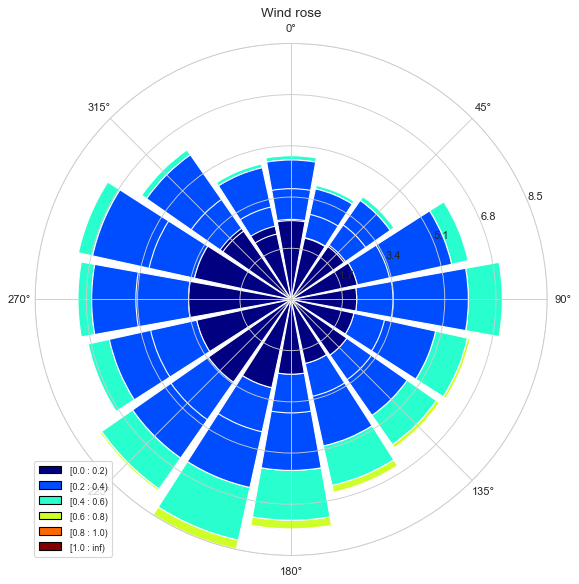

In [ ]:
# Create windrose plot
ax = wr.WindroseAxes.from_ax()
ax.bar(df.wd10, df.ws10, normed = True, opening = 0.9, edgecolor = 'white')
ax.bar(df.wd10, df.TARGETVAR, normed = True, opening = 0.9, edgecolor = 'white')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_legend()
ax.set_title('Wind rose')
plt.show()

In [ ]:
mean_ws = df.groupby(by= 'wd10').mean().ws10

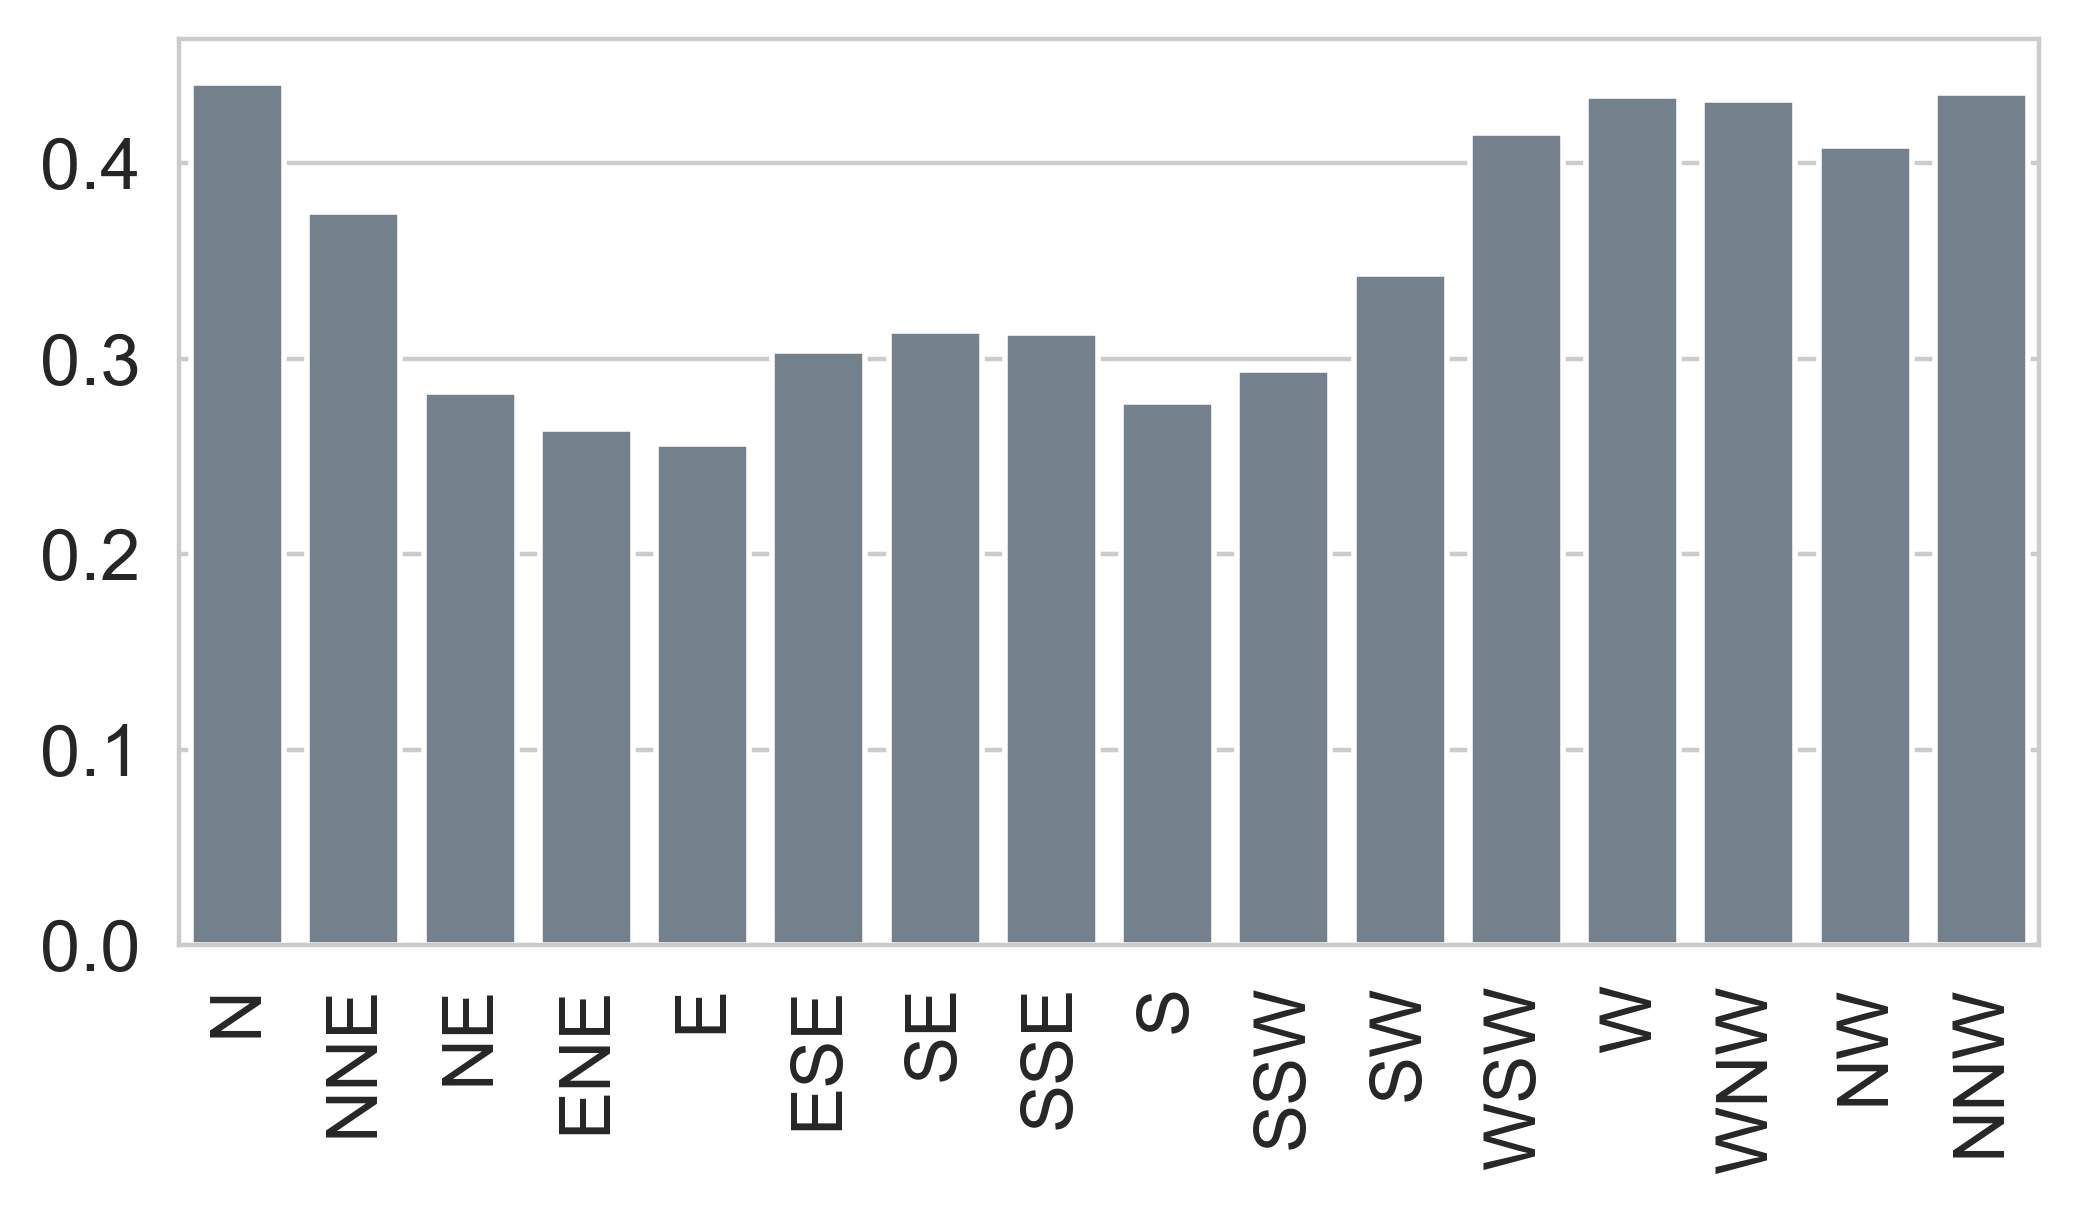

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3), dpi = 400)
sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'TARGETVAR', 
            ax = ax, 
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"],
            color = 'slategray',
            ci = None)
ax.tick_params(axis='both', labelsize=fontsize)
plt.xlabel('', fontsize = fontsize + 1)
plt.ylabel('')# 'Energy Production', fontsize = fontsize + 1)
plt.xticks(rotation=90)
#plt.title('Electricity production by wind direction')
plt.show()

In [ ]:
ws_bins = np.arange(df.ws100.min() // 1, (df.ws100.max() + 1) // 1 + 2, 2, dtype = int)

ws_labels = []
for i, bin_ in enumerate(ws_bins):
    if i > len(ws_bins) - 2:
        break
    ws_labels.append(f'{bin_} - {ws_bins[i + 1]}')
    
df['ws100bin'] = pd.cut(df['ws100'], bins=ws_bins, labels=ws_labels)
df.info()
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ZONEID      175440 non-null  int64         
 1   TIMESTAMP   175440 non-null  datetime64[ns]
 2   TARGETVAR   175265 non-null  float64       
 3   U10         175440 non-null  float64       
 4   V10         175440 non-null  float64       
 5   U100        175440 non-null  float64       
 6   V100        175440 non-null  float64       
 7   ws10        175440 non-null  float64       
 8   ws100       175440 non-null  float64       
 9   ws100_rd    175440 non-null  float64       
 10  wd10        175440 non-null  float64       
 11  wd100       175440 non-null  float64       
 12  wd100_card  175440 non-null  object        
 13  wd10_card   175440 non-null  object        
 14  HOUR        175440 non-null  int64         
 15  MONTH       175440 non-null  int64         
 16  wd

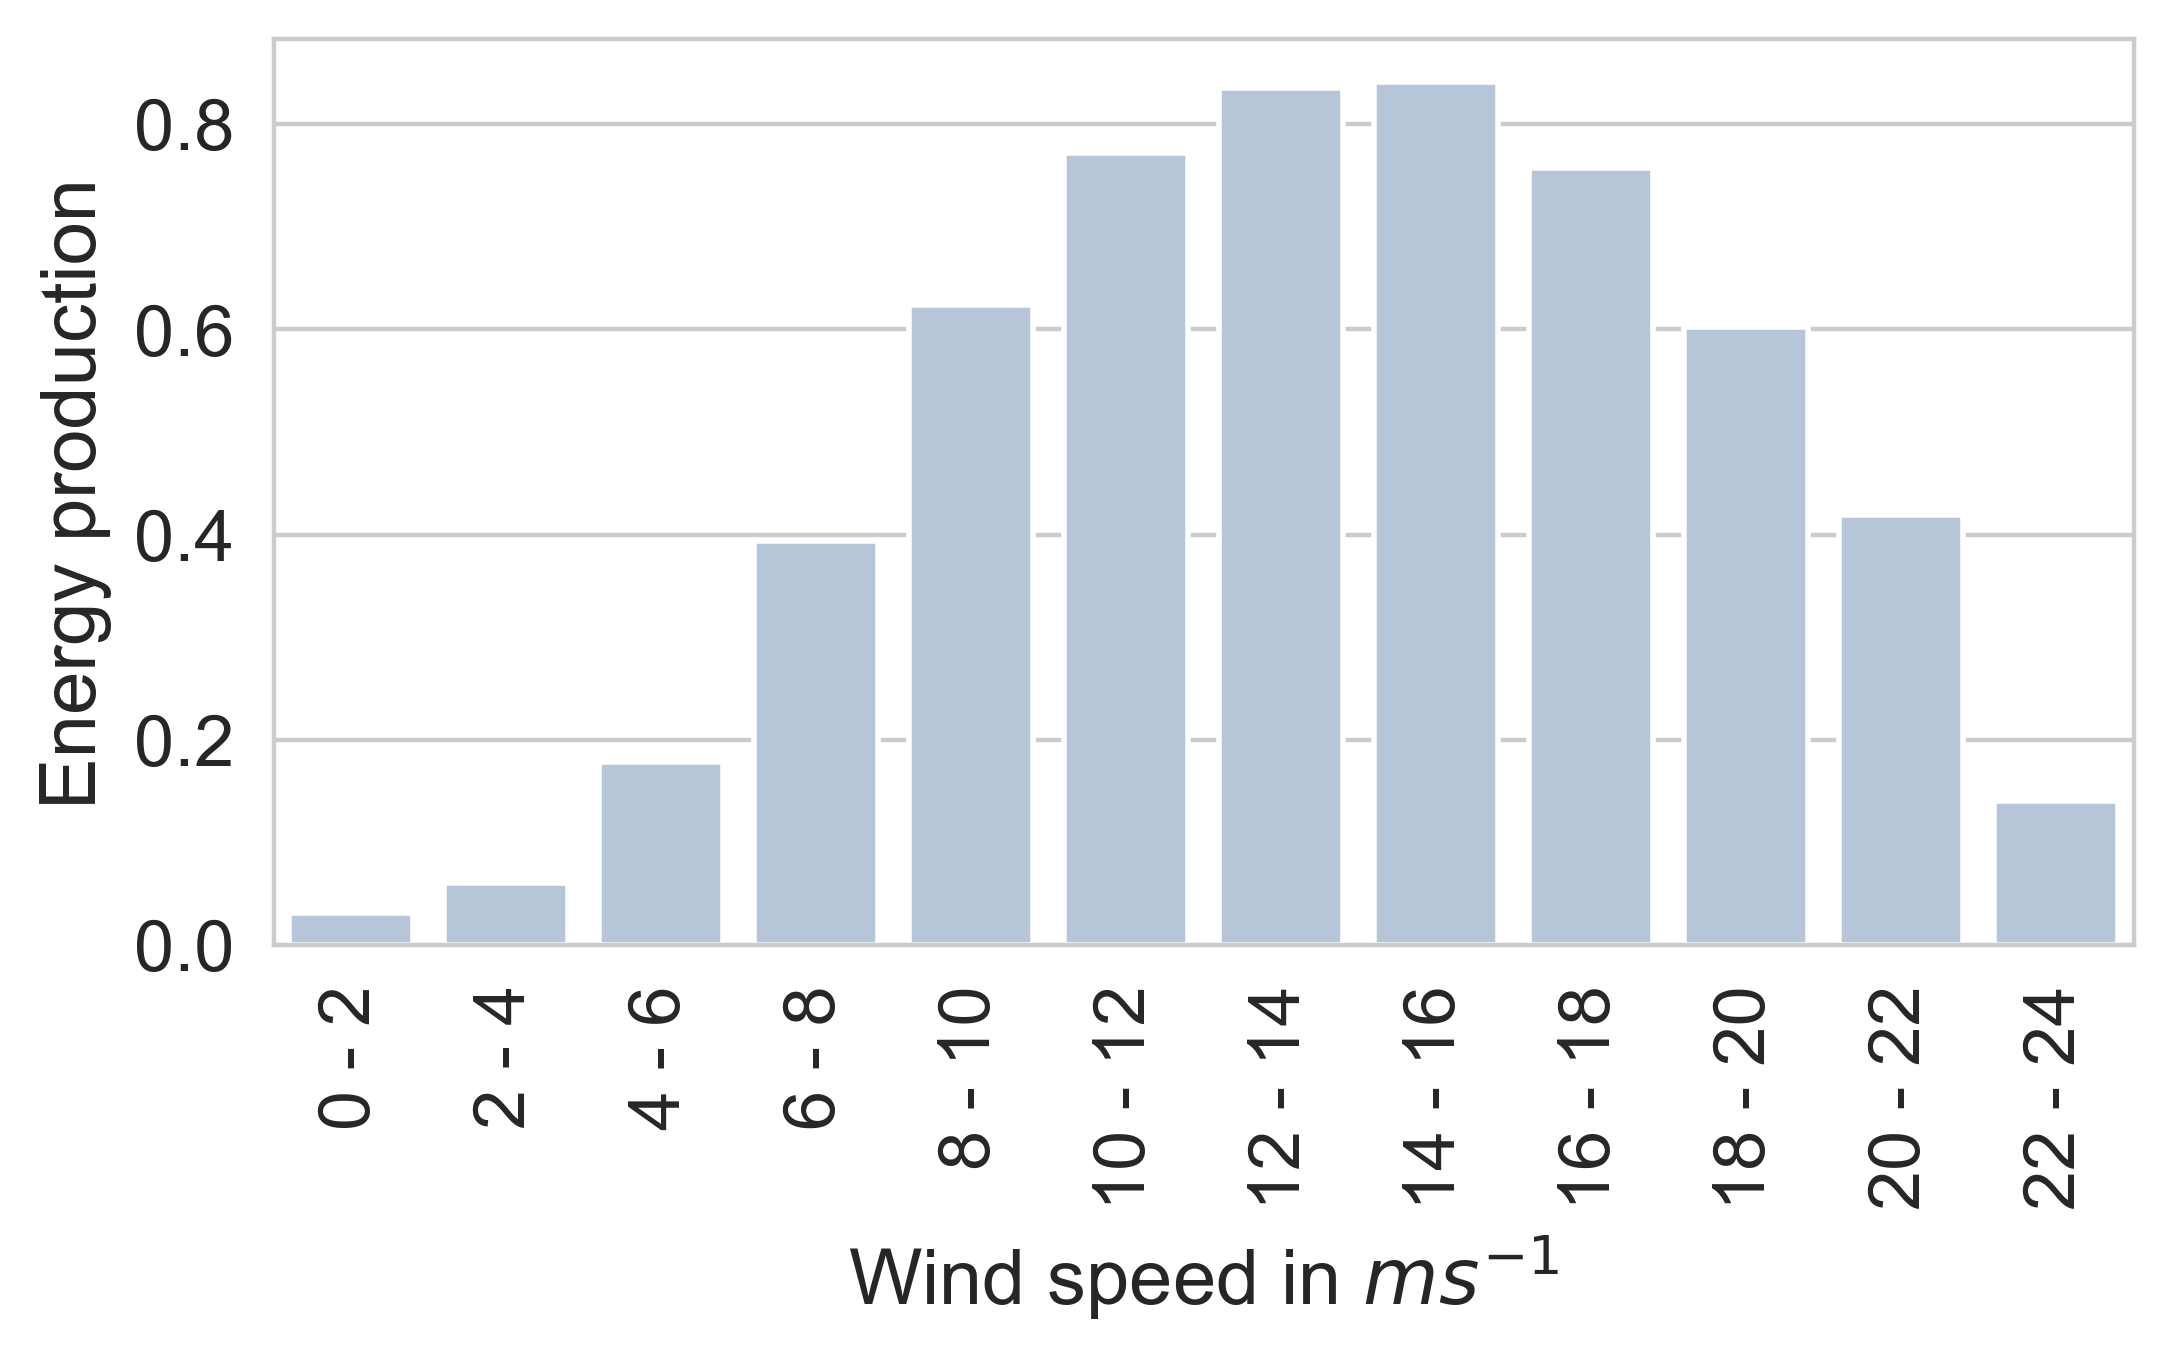

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3), dpi = 400)
sns.barplot(data = df, 
            x = 'ws100bin', 
            y = 'TARGETVAR', 
            ax = ax, 
            order = ws_labels,
            color = 'lightsteelblue',
            ci = None)
ax.tick_params(axis='both', labelsize=fontsize)
plt.xlabel('Wind speed in '+ r'$ms^{-1}$', fontsize = fontsize + 1)
plt.ylabel('Energy production', fontsize = fontsize + 1)
plt.xticks(rotation=90)
#plt.title('Electricity production by wind speed')
plt.show()

In [ ]:
ws_bins

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

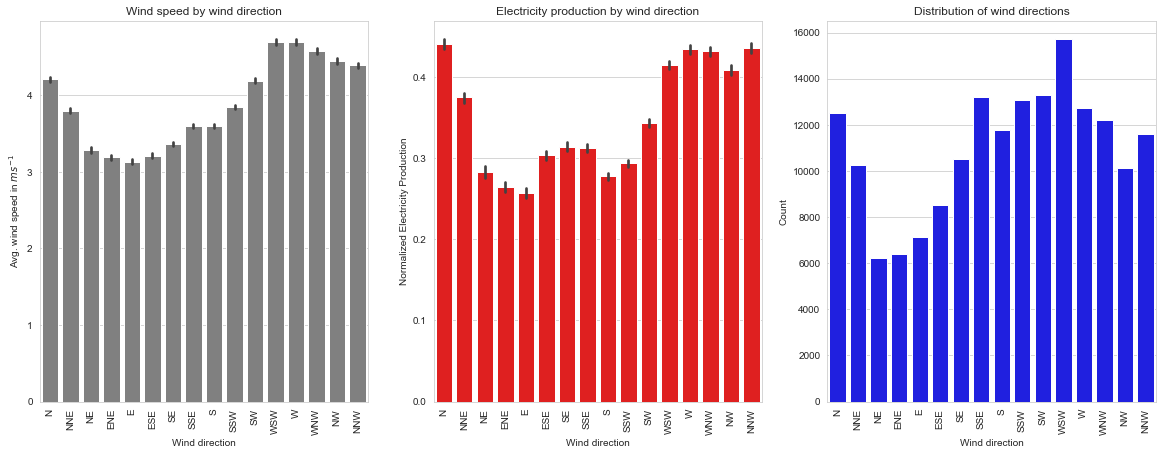

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (20, 7))
sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'ws10', 
            ax = ax[0], 
            color = 'gray',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[0].set_xlabel('Wind direction')
ax[0].set_ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
ax[0].set_title('Wind speed by wind direction')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'TARGETVAR', 
            ax = ax[1], 
            color='red',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[1].set_xlabel('Wind direction')
ax[1].set_ylabel('Normalized Electricity Production')
ax[1].set_title('Electricity production by wind direction')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

sns.countplot(data = df, 
            x = 'wd100_card', 
            ax = ax[2], 
            color='blue',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[2].set_xlabel('Wind direction')
ax[2].set_ylabel('Count')
ax[2].set_title('Distribution of wind directions')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

plt.show()

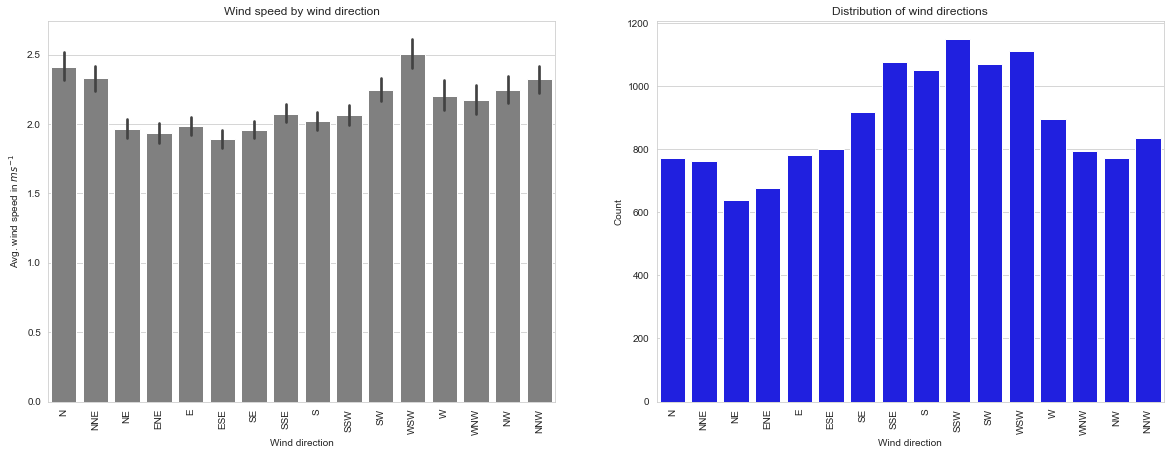

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20, 7))
sns.barplot(data = df_zero, 
            x = 'wd100_card', 
            y = 'ws10', 
            ax = ax[0], 
            color = 'gray',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[0].set_xlabel('Wind direction')
ax[0].set_ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
ax[0].set_title('Wind speed by wind direction')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(data = df_zero, 
            x = 'wd100_card', 
            ax = ax[1], 
            color='blue',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[1].set_xlabel('Wind direction')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of wind directions')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90 )

plt.show()

[Text(0, 0, 'N'),
 Text(1, 0, 'NNE'),
 Text(2, 0, 'NE'),
 Text(3, 0, 'ENE'),
 Text(4, 0, 'E'),
 Text(5, 0, 'ESE'),
 Text(6, 0, 'SE'),
 Text(7, 0, 'SSE'),
 Text(8, 0, 'S'),
 Text(9, 0, 'SSW'),
 Text(10, 0, 'SW'),
 Text(11, 0, 'WSW'),
 Text(12, 0, 'W'),
 Text(13, 0, 'WNW'),
 Text(14, 0, 'NW'),
 Text(15, 0, 'NNW')]

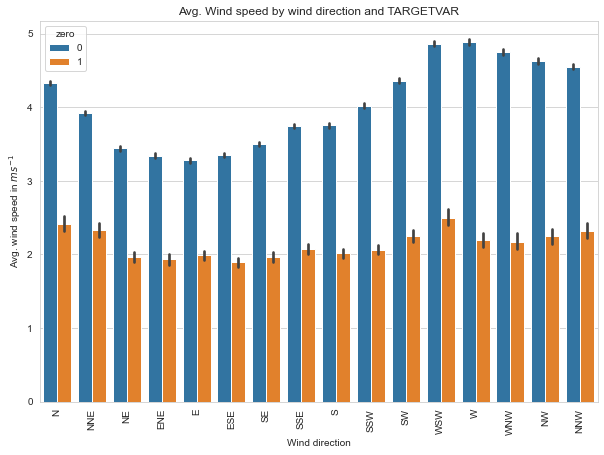

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'ws10', 
            ax = ax, 
            hue = 'zero',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax.set_xlabel('Wind direction')
ax.set_ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
ax.set_title('Avg. Wind speed by wind direction and TARGETVAR')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/Users/msp/neuefische/Capstone_WindPowerPredicting/.venv/lib/python3.9/site-packages/matplotlib/axes/_base.py:2283: UserWarning:




[]

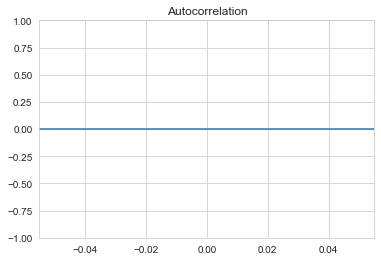

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.TARGETVAR, lags = 30, alpha = 0.05, use_vlines=True)
plt.plot()

/Users/msp/neuefische/Capstone_WindPowerPredicting/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



[]

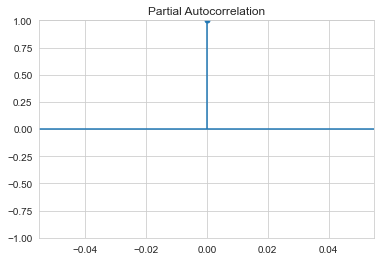

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.TARGETVAR, lags = 5, alpha = 0.05, use_vlines=True)
plt.plot()

In [ ]:
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,wd10_rd,zero,ws100bin
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,4.0,322.0,322.0,NW,NW,1,1,320.0,1,4 - 6
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,4.0,305.0,306.0,NW,NW,2,1,305.0,0,4 - 6
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,4.0,287.0,289.0,WNW,WNW,3,1,285.0,0,2 - 4
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,4.0,273.0,276.0,W,W,4,1,270.0,0,2 - 4
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,2.0,260.0,264.0,W,W,5,1,260.0,0,2 - 4


In [ ]:
df['is_weekday'] = df.TIMESTAMP.dt.weekday

def is_weekday(weekday):
    if weekday in [5,6]:
        return 0
    else: 
        return 1

df.is_weekday = df.is_weekday.apply(lambda x: is_weekday(x))

df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,ws100_rd,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,wd10_rd,zero,ws100bin,is_weekday
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,4.0,322.0,322.0,NW,NW,1,1,320.0,1,4 - 6,0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,4.0,305.0,306.0,NW,NW,2,1,305.0,0,4 - 6,0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,4.0,287.0,289.0,WNW,WNW,3,1,285.0,0,2 - 4,0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,4.0,273.0,276.0,W,W,4,1,270.0,0,2 - 4,0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,2.0,260.0,264.0,W,W,5,1,260.0,0,2 - 4,0


0.36487462094644507
0.34289309795464146
6.4106052652921575%


<AxesSubplot:xlabel='is_weekday', ylabel='TARGETVAR'>

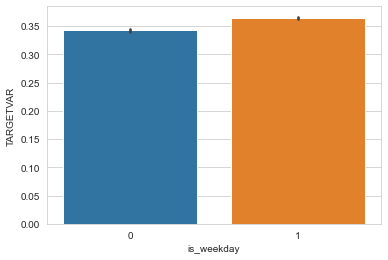

In [ ]:
df_weekday = df[df.is_weekday == 1]
df_weekend = df[df.is_weekday == 0]

print(df_weekday.TARGETVAR.mean())
print(df_weekend.TARGETVAR.mean())

print(str((df_weekday.TARGETVAR.mean() / df_weekend.TARGETVAR.mean() - 1) * 100) + "%")

sns.barplot(data = df, x = 'is_weekday', y = 'TARGETVAR' )

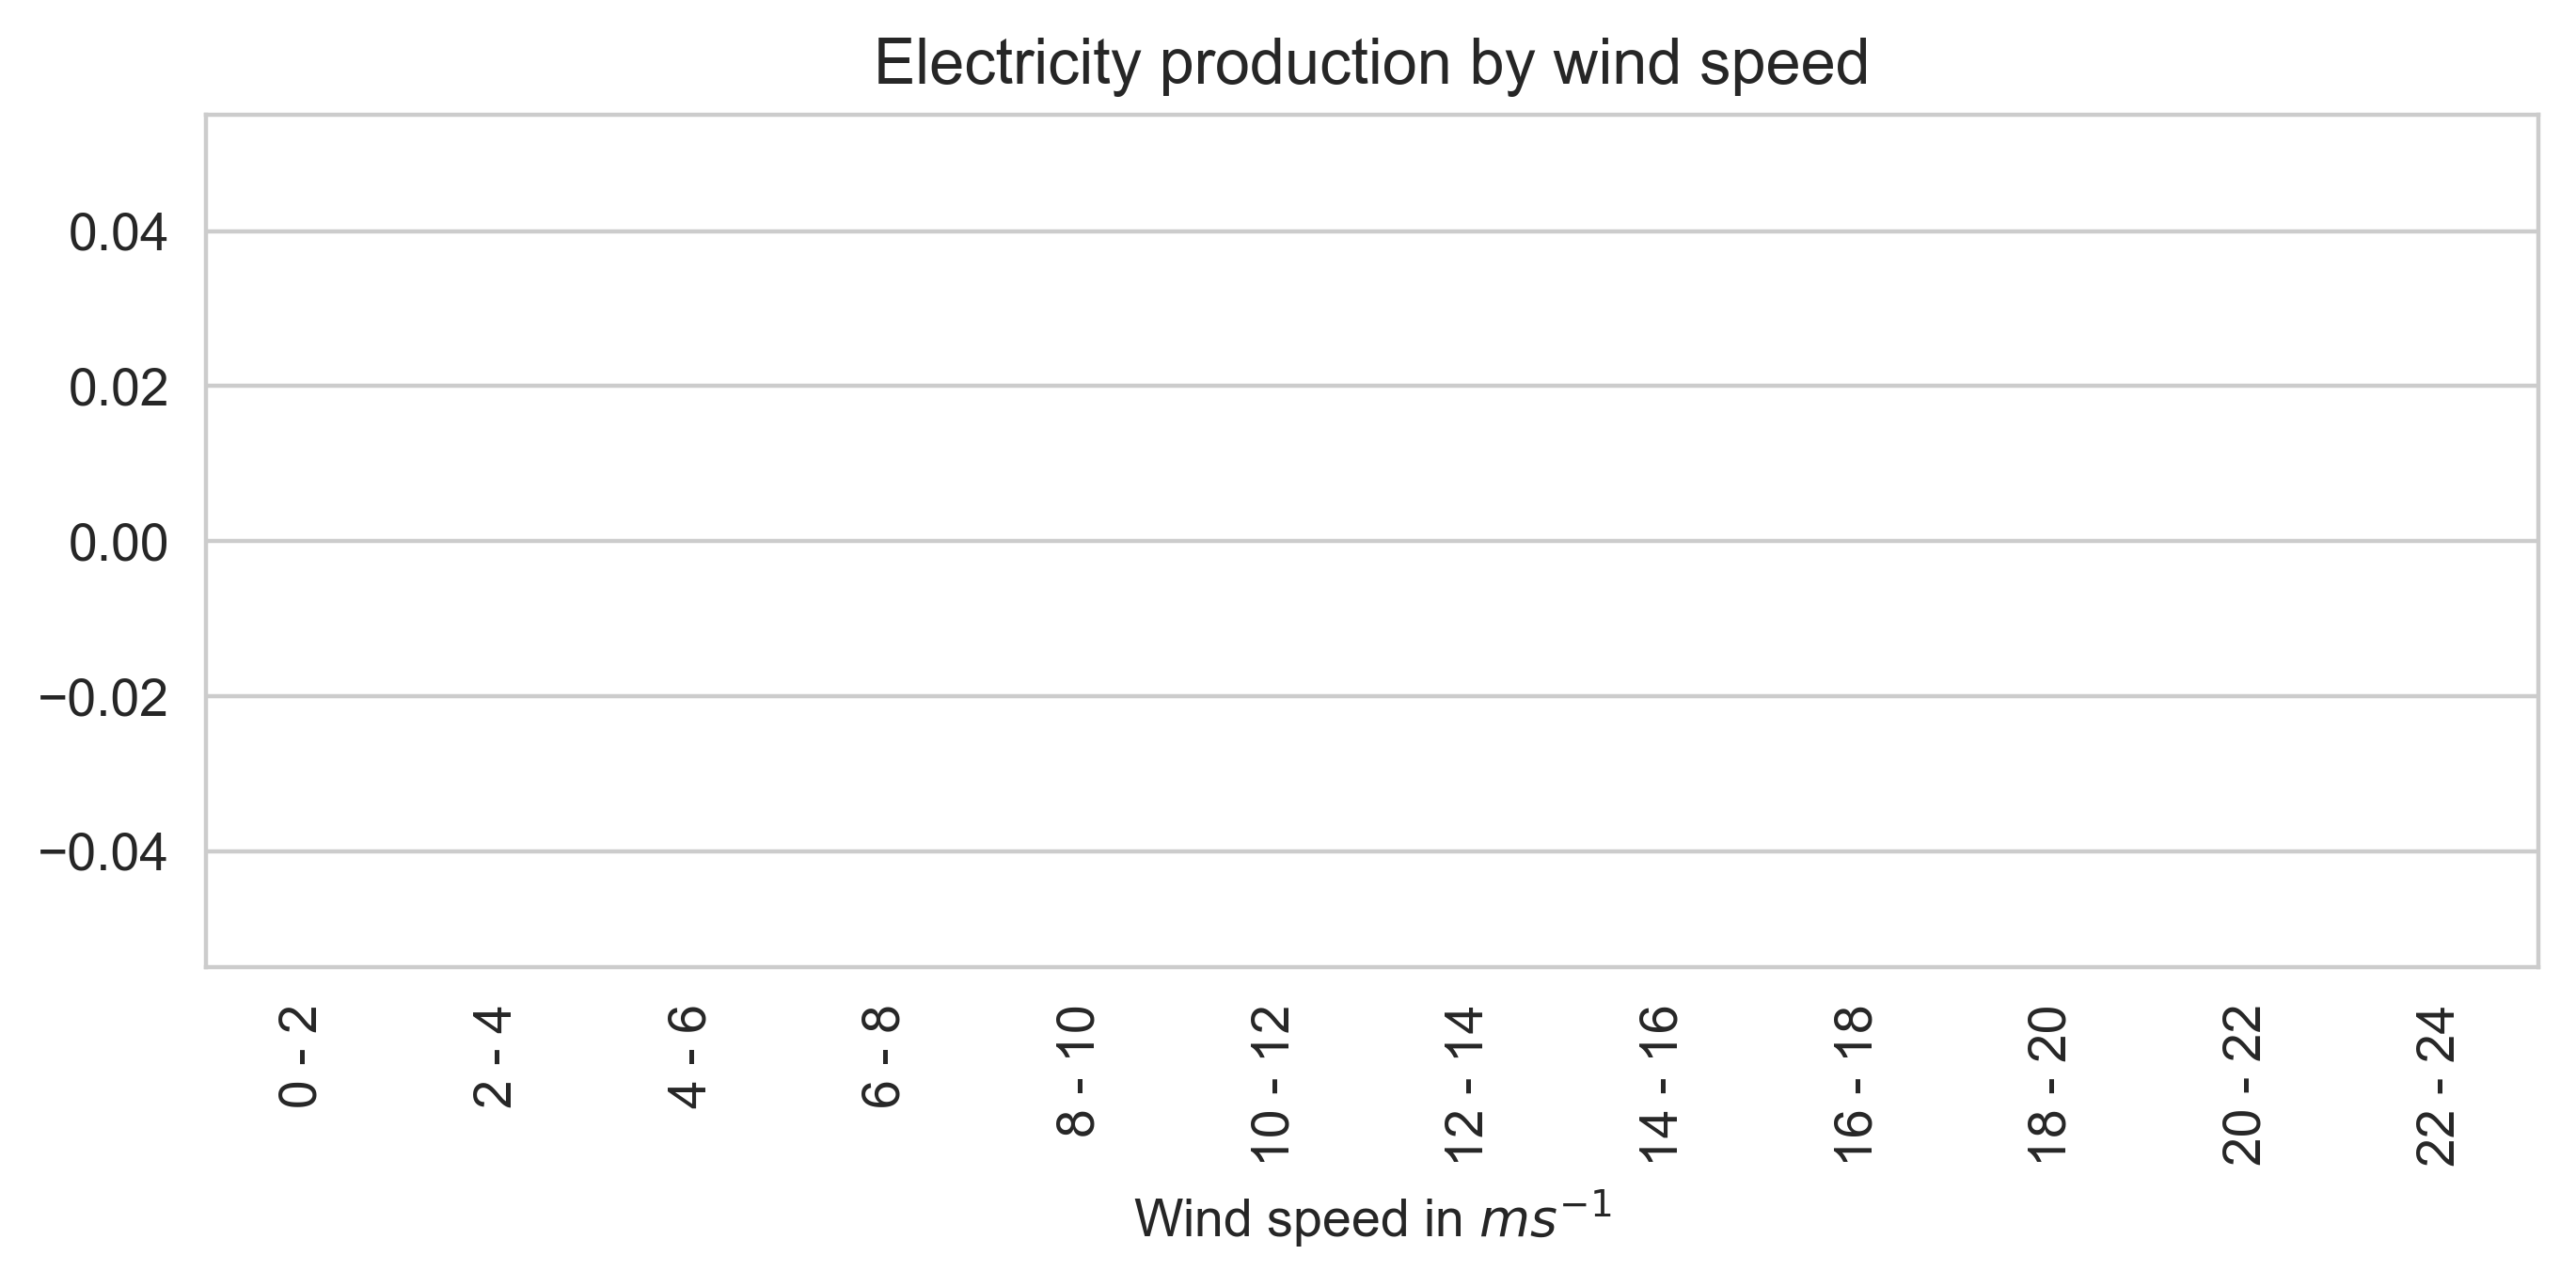

In [ ]:
fig, ax = plt.subplots(figsize = (8, 3), dpi = 400)
sns.barplot(data = df, 
            x = 'is_weekday', 
            y = 'TARGETVAR', 
            ax = ax, 
            order = ws_labels,
            color = 'lightsteelblue')
plt.xlabel('Wind speed in '+ r'$ms^{-1}$')
plt.ylabel('')
plt.xticks(rotation=90)
plt.title('Electricity production by wind speed')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(df_weekday.TARGETVAR, df_weekend.TARGETVAR)

Ttest_indResult(statistic=nan, pvalue=nan)

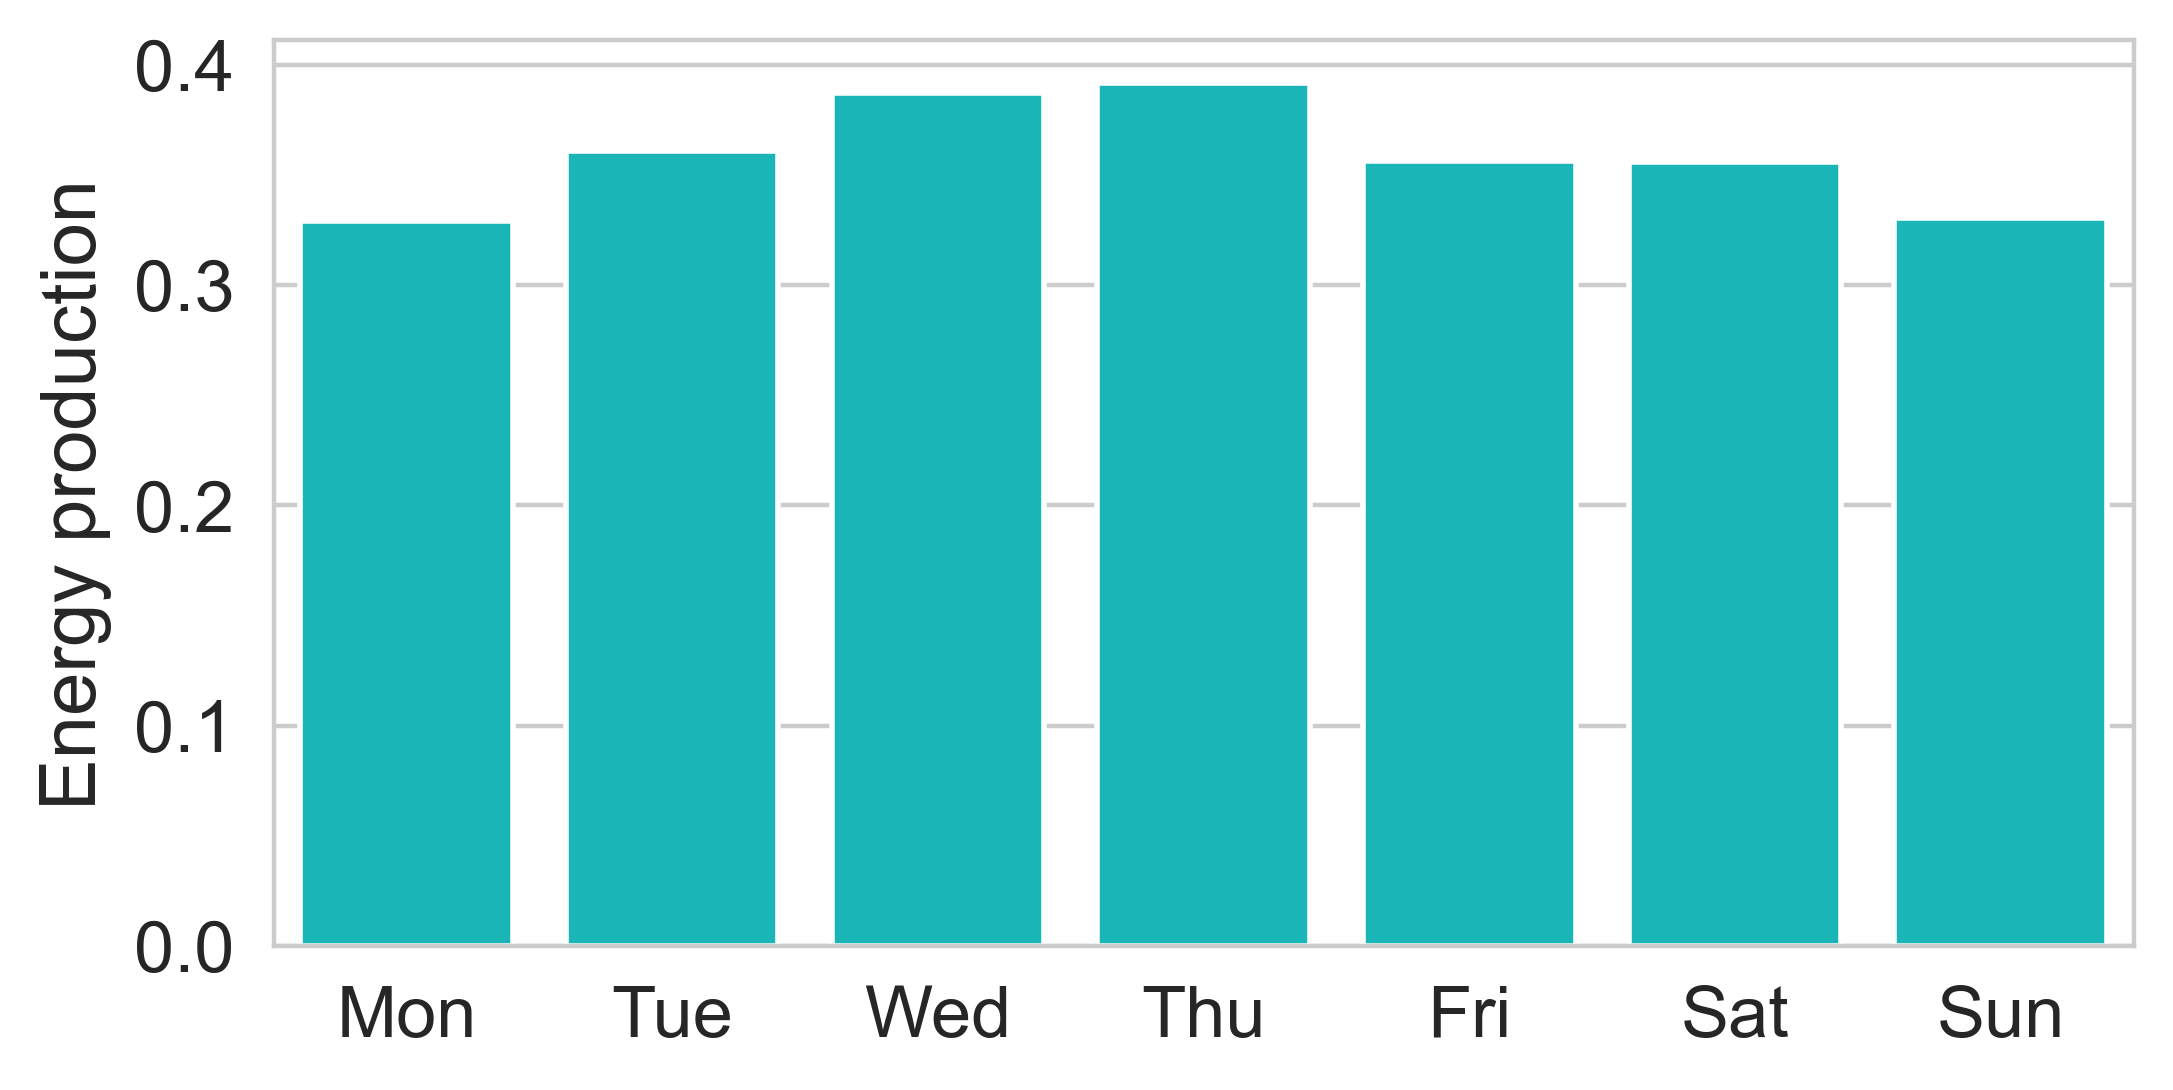

In [ ]:
df['weekday'] = df.TIMESTAMP.dt.weekday

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_dict = {i:key for i,key in enumerate(weekdays)}

fig, ax = plt.subplots(figsize = (6,3), dpi = 400)
sns.barplot(data = df, x = 'weekday', y = 'TARGETVAR', color = 'darkturquoise', errcolor='gray',ax = ax, ci = None)
ax.tick_params(axis='both', labelsize=fontsize)
#plt.title('Electricity production by day of the week')
plt.ylabel('Energy production', fontsize = fontsize + 1)
plt.xlabel('')
ax.set_xticklabels(weekdays)
plt.show()

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

season_dict = {1: "Summer", 2:"Autumn", 3:"Winter", 4:"Spring"}
month_season_dict = {month_idx + 1: season_dict[month_idx % 12 // 3 + 1] for month_idx, month in enumerate(months)}

month_season_dict

df['SEASON'] = df.MONTH.apply(lambda x: month_season_dict[x])

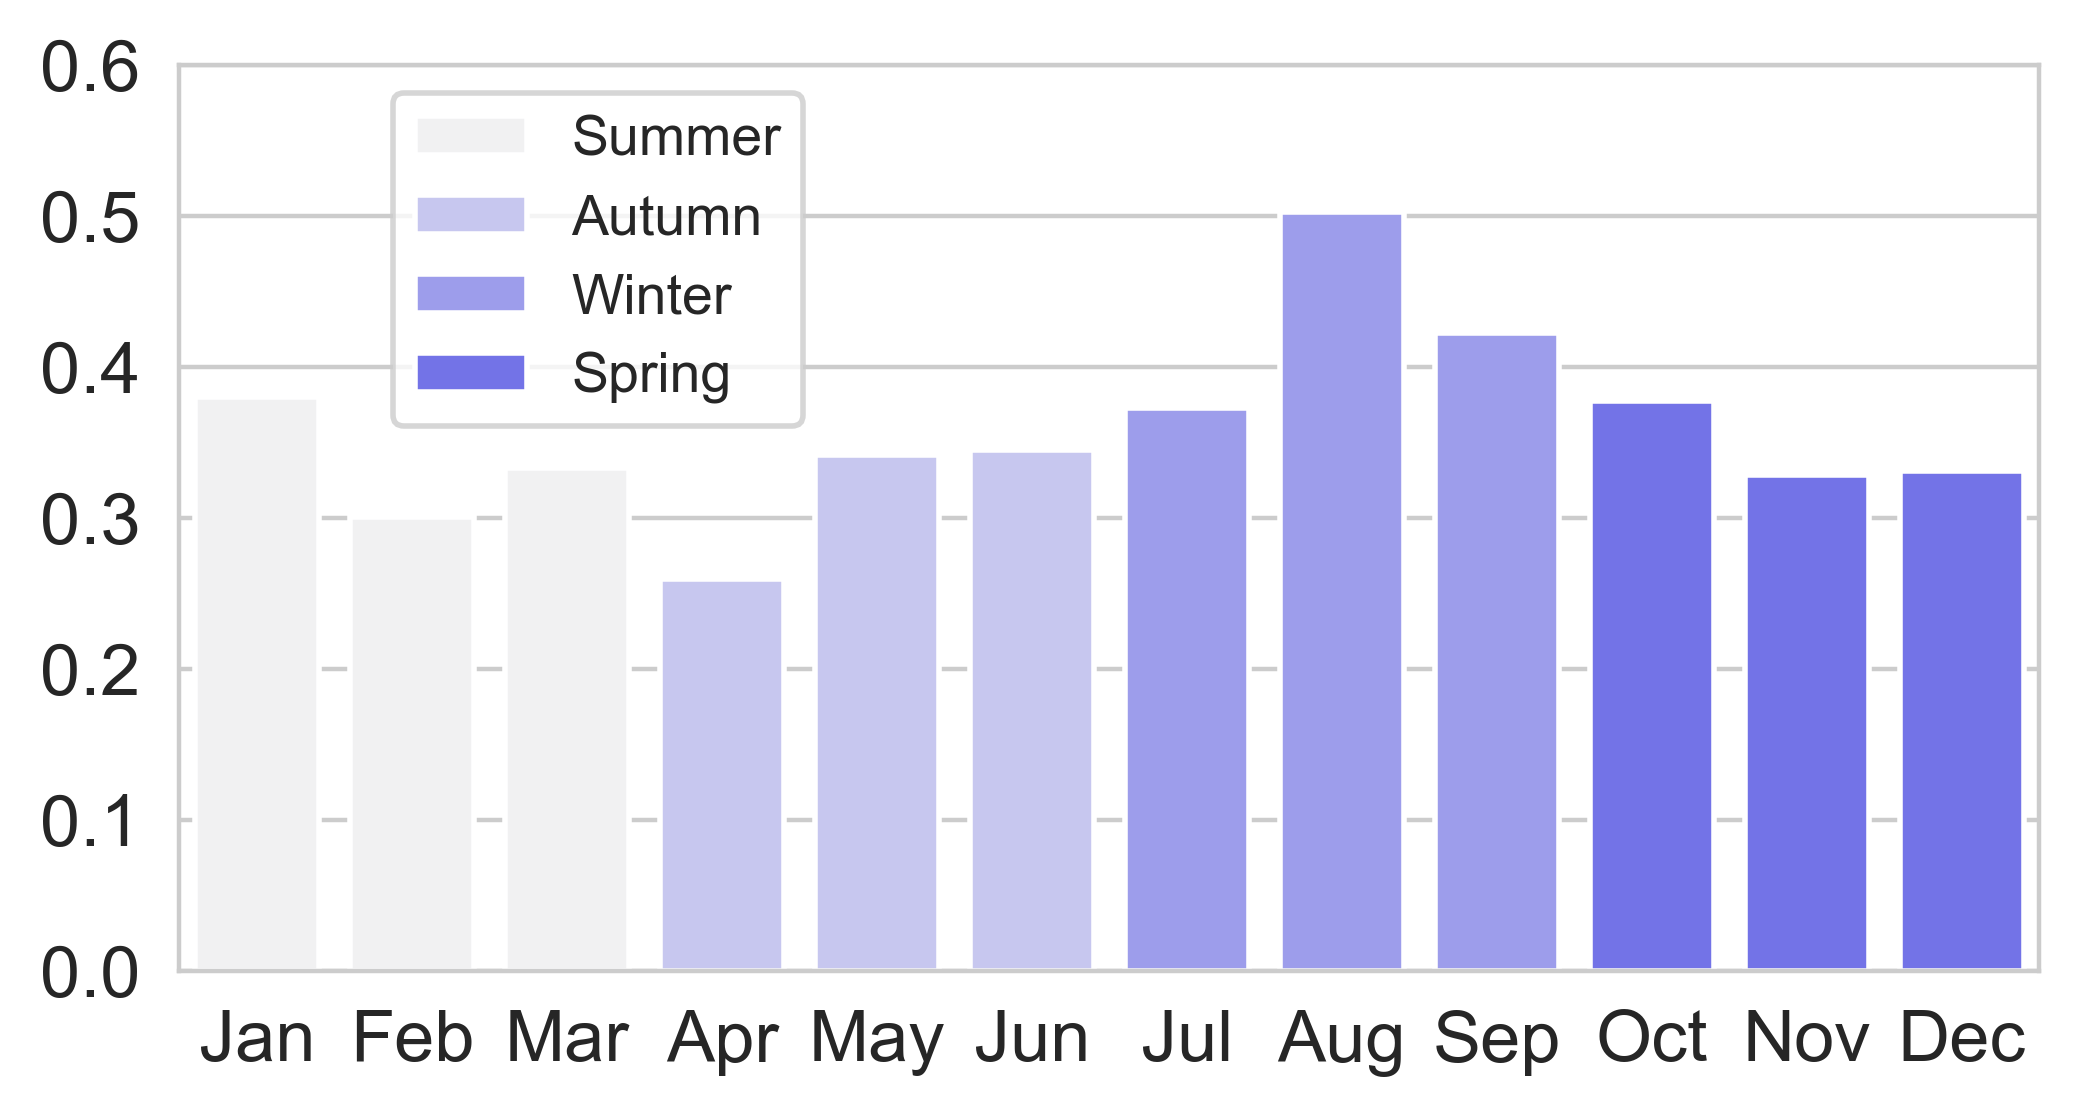

In [ ]:
sns.set_palette('light:b')
fig, ax = plt.subplots(figsize = (6,3), dpi = 400)
sns.barplot(data = df, x = 'MONTH', y = 'TARGETVAR', hue = 'SEASON', errcolor='gray',ax = ax, ci = None, dodge=False)
ax.tick_params(axis='both', labelsize=fontsize)
#plt.title('Electricity production by month')
plt.ylabel('')
plt.xlabel('')
plt.ylim([0,0.6])
plt.legend(loc = 'upper left', bbox_to_anchor=(0.1, 1, 0., 0.))
ax.set_xticklabels(months)
plt.show()

In [ ]:
df.groupby(by = 'weekday').mean()['TARGETVAR'].max() / df.groupby(by = 'weekday').mean()['TARGETVAR'].min() - 1

0.18953544285396018

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df.ws100)
y = df.TARGETVAR

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75, random_state=42)

In [ ]:
X_train

,ws100
35641,0.314641
6419,3.195149
171380,7.611572
156427,4.448997
141010,2.879158
...,...
119879,3.352624
103694,10.481218
131932,8.423953
146867,4.093662


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mean_squared_error(y_test, y_pred, squared = False)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred

In [ ]:
nas = df[df.TARGETVAR.isna()]

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(nas)


In [ ]:
#df['DAY_INDEX'] = df.TIMESTAMP.dt.day_of_year + (df.TIMESTAMP.dt.year - 2012) * 365

df['DATE'] = df.TIMESTAMP.dt.date

In [ ]:
RSEED = 42
np.random.seed(42)
days = df.dropna().DATE.unique()
np.random.shuffle(days)
print(days[20])

train_len = int(len(days) * 0.75)
test_len = len(days) - train_len

train_days = days[:train_len]
test_days = days[-test_len:]

print(len(train_days), len(test_days), len(set(train_days).union(set(test_days))))

2013-08-29
548 183 731


In [ ]:
datatrain = df[df.DATE.isin(train_days)]
datatest = df[df.DATE.isin(test_days)]